# Imports

In [1]:
# !pip install pypolyagamma

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import importlib
import os
import sys

from base.experiment import *
from logistic.env_logistic import *
from logistic.agent_logistic import *

import numpy as np
import pandas as pd
import plotnine as gg

# 2-D

In [2]:
def simple_compare_laplace_langevin(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
                                   alpha, beta, tol, n_steps, seed=0, var=1, verbosity=0):
    laplace_agent = LaplaceTSLogisticBandit(num_articles, dim+1, theta_mean, theta_std, epsilon1,
                          alpha,beta,tol, verbosity=verbosity)
    langevin_agent = BasicLangevinTS(num_articles, dim+1, [0]*(dim+1), cov=None, step_size=step_size, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)
    agents = [laplace_agent, langevin_agent]
    env = LogisticBandit(num_articles, dim+1, NormalDist(0,1,dim=dim), DistributionWithConstant(NormalDist(0,var,dim=dim)), seed=seed)
    experiment = ExperimentCompare(agents, env, n_steps,
                   seed=seed, verbosity=verbosity) #, rec_freq=1, unique_id='NULL')
    experiment.run_experiment()
    results = []
    results.append(experiment.results)
    df = pd.DataFrame(results[0])
    print(gg.ggplot(df)
     + gg.aes('t', 'cum_regret', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    print(gg.ggplot(df)
     + gg.aes('t', 'time', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    return results, df

def simple_compare_laplace_langevin_nobias(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
                                   alpha, beta, tol, n_steps, seed=0, var=1, verbosity=0):
    laplace_agent = LaplaceTSLogisticBandit(num_articles, dim, theta_mean, theta_std, epsilon1,
                          alpha,beta,tol, verbosity=verbosity)
    langevin_agent = BasicLangevinTS(num_articles, dim, [0]*dim, cov=None, step_size=step_size, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)
    agents = [laplace_agent, langevin_agent]
    env = LogisticBandit(num_articles, dim, NormalDist(0,1,dim=dim), NormalDist(0,var,dim=dim), seed=seed)
    experiment = ExperimentCompare(agents, env, n_steps,
                   seed=seed, verbosity=verbosity) #, rec_freq=1, unique_id='NULL')
    experiment.run_experiment()
    results = []
    results.append(experiment.results)
    df = pd.DataFrame(results[0])
    print(gg.ggplot(df)
     + gg.aes('t', 'cum_regret', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    print(gg.ggplot(df)
     + gg.aes('t', 'time', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    return results, df

theta [-0.84031804 -0.03882612]
Experiment: Step 0
 Laplace sample: array([-0.58087813, -0.52516981])
 Sample: array([0.17455023, 0.1560995 ])
Experiment: Step 1
 Laplace sample: array([-5.61976133,  1.3440697 ])
 Sample: array([-0.86101939,  0.66061304])
Experiment: Step 2
 Laplace sample: array([-5.1615787,  1.9479031])
 Sample: array([-1.91384166, -0.25789664])
Experiment: Step 3
 Laplace sample: array([ 4.48180252, 26.35066431])
 Sample: array([-0.65203677, -0.83020015])
Experiment: Step 4
 Laplace sample: array([-1.28050298, -1.80114659])
 Sample: array([-0.61852488, -0.62676039])
Experiment: Step 5
 Laplace sample: array([-1.58434191, -1.78569545])
 Sample: array([-0.29195336, -1.23952293])
Experiment: Step 6
 Laplace sample: array([-0.37345003,  0.81774815])
 Sample: array([-0.29592313, -0.41299385])
Experiment: Step 7
 Laplace sample: array([-1.53894099,  2.32760757])
 Sample: array([-0.30124919,  0.86810269])
Experiment: Step 8
 Laplace sample: array([-0.16803835,  2.44908929]

 Sample: array([-0.9800347 , -0.54363465])
Experiment: Step 77
 Laplace sample: array([-0.30762555, -0.79578273])
 Sample: array([-0.86448591, -0.58282926])
Experiment: Step 78
 Laplace sample: array([-0.32621683, -0.68272143])
 Sample: array([-0.58801776, -0.68171259])
Experiment: Step 79
 Laplace sample: array([-0.62483383, -0.50808835])
 Sample: array([-1.05779065, -0.51807772])
Experiment: Step 80
 Laplace sample: array([-0.6483864 , -0.56091905])
 Sample: array([-0.6417606 , -0.35228402])
Experiment: Step 81
 Laplace sample: array([-0.15427617, -0.73297761])
 Sample: array([-0.68666154, -0.45145691])
Experiment: Step 82
 Laplace sample: array([-0.55015225, -0.76623052])
 Sample: array([-0.91862722, -0.84230687])
Experiment: Step 83
 Laplace sample: array([-0.92711195, -0.47124439])
 Sample: array([-0.59319341, -0.49723576])
Experiment: Step 84
 Laplace sample: array([-0.08881553, -0.27963701])
 Sample: array([-0.60229263, -0.50397507])
Experiment: Step 85
 Laplace sample: array([-

 Sample: array([-0.52502778, -0.14104769])
Experiment: Step 149
 Laplace sample: array([-0.37126588, -0.25108038])
 Sample: array([-0.50333131, -0.38065198])
Experiment: Step 150
 Laplace sample: array([-0.33251122, -0.01700275])
 Sample: array([-0.33114986, -0.49025141])
Experiment: Step 151
 Laplace sample: array([-0.16492127, -0.53276602])
 Sample: array([-0.57129408, -0.52019755])
Experiment: Step 152
 Laplace sample: array([-0.17478798, -0.17990399])
 Sample: array([-0.42194957, -0.48029981])
Experiment: Step 153
 Laplace sample: array([-0.1886533 , -0.51579326])
 Sample: array([-0.40866282, -0.28519416])
Experiment: Step 154
 Laplace sample: array([-0.12965945, -0.49525613])
 Sample: array([-0.18615772, -0.64477363])
Experiment: Step 155
 Laplace sample: array([-0.25838436, -0.23550759])
 Sample: array([-0.36265935, -0.24530182])
Experiment: Step 156
 Laplace sample: array([-0.33765693, -0.48973898])
 Sample: array([-0.56576498, -0.3562121 ])
Experiment: Step 157
 Laplace sample:

 Sample: array([-0.64228214, -0.29100372])
Experiment: Step 221
 Laplace sample: array([-0.14386914, -0.32351133])
 Sample: array([-0.62780629, -0.04237762])
Experiment: Step 222
 Laplace sample: array([-0.19898775, -0.40332793])
 Sample: array([-0.30668589, -0.18541585])
Experiment: Step 223
 Laplace sample: array([-0.19410015, -0.25244883])
 Sample: array([-0.33806164, -0.25058527])
Experiment: Step 224
 Laplace sample: array([-0.24572662, -0.11100733])
 Sample: array([-0.63862449, -0.18554582])
Experiment: Step 225
 Laplace sample: array([-0.37683642, -0.02527365])
 Sample: array([-0.70586695, -0.30393464])
Experiment: Step 226
 Laplace sample: array([-0.29159465, -0.36946614])
 Sample: array([-0.56412189, -0.46737053])
Experiment: Step 227
 Laplace sample: array([-0.22731418, -0.40607369])
 Sample: array([-0.50642107, -0.37093616])
Experiment: Step 228
 Laplace sample: array([-0.49185651, -0.39436947])
 Sample: array([-0.52417708, -0.21748   ])
Experiment: Step 229
 Laplace sample:

 Sample: array([-0.66559457, -0.0842106 ])
Experiment: Step 293
 Laplace sample: array([-0.28137296, -0.2818549 ])
 Sample: array([-0.69994548, -0.21600891])
Experiment: Step 294
 Laplace sample: array([-0.26307339, -0.30069962])
 Sample: array([-0.70047342, -0.18540515])
Experiment: Step 295
 Laplace sample: array([-0.48910213, -0.47550531])
 Sample: array([-0.74083766, -0.15217045])
Experiment: Step 296
 Laplace sample: array([-0.69766133, -0.4419168 ])
 Sample: array([-0.81087007, -0.15997052])
Experiment: Step 297
 Laplace sample: array([-0.49146595, -0.26868358])
 Sample: array([-0.62774556, -0.43524141])
Experiment: Step 298
 Laplace sample: array([-0.34416632, -0.25925949])
 Sample: array([-0.59002193, -0.55464622])
Experiment: Step 299
 Laplace sample: array([-0.66573412, -0.37319489])
 Sample: array([-0.50489582, -0.61578002])
Experiment: Step 300
 Laplace sample: array([-0.35257464, -0.40505621])
 Sample: array([-0.77839884, -0.39537266])
Experiment: Step 301
 Laplace sample:

 Sample: array([-0.65856033, -0.22153226])
Experiment: Step 365
 Laplace sample: array([-0.57977045, -0.21004678])
 Sample: array([-0.64392932, -0.08270725])
Experiment: Step 366
 Laplace sample: array([-0.60662623, -0.14909622])
 Sample: array([-0.51025302, -0.21793481])
Experiment: Step 367
 Laplace sample: array([-0.61960431,  0.05119157])
 Sample: array([-0.65569977, -0.12906319])
Experiment: Step 368
 Laplace sample: array([-0.44662038, -0.2162967 ])
 Sample: array([-0.72104669, -0.15545772])
Experiment: Step 369
 Laplace sample: array([-0.51825102, -0.17113616])
 Sample: array([-0.81157543, -0.10574263])
Experiment: Step 370
 Laplace sample: array([-0.57891305, -0.365471  ])
 Sample: array([-0.7057185 , -0.24355115])
Experiment: Step 371
 Laplace sample: array([-0.50206689, -0.20331111])
 Sample: array([-0.76444228, -0.13932538])
Experiment: Step 372
 Laplace sample: array([-0.70739342, -0.21097194])
 Sample: array([-0.72772119,  0.05075769])
Experiment: Step 373
 Laplace sample:

 Sample: array([-0.92727101, -0.13258993])
Experiment: Step 437
 Laplace sample: array([-0.56121242, -0.24908865])
 Sample: array([-0.73357511, -0.08810136])
Experiment: Step 438
 Laplace sample: array([-0.70669488, -0.03074979])
 Sample: array([-0.62324752, -0.33724083])
Experiment: Step 439
 Laplace sample: array([-0.5968825, -0.2302498])
 Sample: array([-0.54866617, -0.24785916])
Experiment: Step 440
 Laplace sample: array([-7.03294761e-01, -4.02705212e-04])
 Sample: array([-0.54043029, -0.15749111])
Experiment: Step 441
 Laplace sample: array([-0.64693109, -0.10834668])
 Sample: array([-0.84088192, -0.11592597])
Experiment: Step 442
 Laplace sample: array([-0.61729982, -0.0283821 ])
 Sample: array([-0.90575593, -0.2270778 ])
Experiment: Step 443
 Laplace sample: array([-0.62454455, -0.05023996])
 Sample: array([-0.85004423, -0.15571805])
Experiment: Step 444
 Laplace sample: array([-0.43096618, -0.0811393 ])
 Sample: array([-0.86732747, -0.19652073])
Experiment: Step 445
 Laplace s

 Sample: array([-0.72434611, -0.11581758])
Experiment: Step 509
 Laplace sample: array([-0.40136535, -0.26093743])
 Sample: array([-0.87758536, -0.18949353])
Experiment: Step 510
 Laplace sample: array([-0.6085861 , -0.23474989])
 Sample: array([-0.74463949, -0.18167262])
Experiment: Step 511
 Laplace sample: array([-0.62764205,  0.03424426])
 Sample: array([-0.77568617, -0.12469155])
Experiment: Step 512
 Laplace sample: array([-0.8310423 , -0.17886241])
 Sample: array([-0.76702173, -0.03212563])
Experiment: Step 513
 Laplace sample: array([-0.59641092, -0.01957245])
 Sample: array([-0.88740104, -0.08903173])
Experiment: Step 514
 Laplace sample: array([-0.6901103 , -0.08071685])
 Sample: array([-0.73973878, -0.05327132])
Experiment: Step 515
 Laplace sample: array([-0.5785633 , -0.05154761])
 Sample: array([-0.83045207, -0.07102333])
Experiment: Step 516
 Laplace sample: array([-0.57999072, -0.01060821])
 Sample: array([-0.92365116, -0.17747746])
Experiment: Step 517
 Laplace sample:

 Sample: array([-0.60064205, -0.22822488])
Experiment: Step 581
 Laplace sample: array([-0.79123662, -0.08988843])
 Sample: array([-0.67148022, -0.07971193])
Experiment: Step 582
 Laplace sample: array([-0.66392484, -0.09469326])
 Sample: array([-0.61961285, -0.23699656])
Experiment: Step 583
 Laplace sample: array([-0.67370861, -0.08157666])
 Sample: array([-0.82750993, -0.05840234])
Experiment: Step 584
 Laplace sample: array([-0.57672305, -0.06834603])
 Sample: array([-0.85043211, -0.15369421])
Experiment: Step 585
 Laplace sample: array([-0.75263627, -0.10773922])
 Sample: array([-0.79573846, -0.23475842])
Experiment: Step 586
 Laplace sample: array([-0.7335256, -0.2368418])
 Sample: array([-0.83775958,  0.00236477])
Experiment: Step 587
 Laplace sample: array([-0.62596842, -0.06507512])
 Sample: array([-0.74997701, -0.17129876])
Experiment: Step 588
 Laplace sample: array([-0.69718781, -0.16732385])
 Sample: array([-0.87940744, -0.18635615])
Experiment: Step 589
 Laplace sample: a

 Sample: array([-0.84197532, -0.105121  ])
Experiment: Step 653
 Laplace sample: array([-0.62282354, -0.15861054])
 Sample: array([-0.82499377, -0.07009174])
Experiment: Step 654
 Laplace sample: array([-0.70809007, -0.02022659])
 Sample: array([-0.81403361, -0.08522618])
Experiment: Step 655
 Laplace sample: array([-0.71328992, -0.11640114])
 Sample: array([-0.87623288, -0.12127332])
Experiment: Step 656
 Laplace sample: array([-0.64283195, -0.274748  ])
 Sample: array([-0.85594322, -0.02477648])
Experiment: Step 657
 Laplace sample: array([-0.53518622, -0.24161682])
 Sample: array([-0.85672648, -0.15884076])
Experiment: Step 658
 Laplace sample: array([-0.76919883, -0.1688671 ])
 Sample: array([-0.80185938, -0.20905009])
Experiment: Step 659
 Laplace sample: array([-0.75365608, -0.15116913])
 Sample: array([-0.78112228, -0.26291356])
Experiment: Step 660
 Laplace sample: array([-0.6363822 , -0.04263878])
 Sample: array([-0.66770834, -0.04804007])
Experiment: Step 661
 Laplace sample:

 Sample: array([-0.71762471, -0.14032731])
Experiment: Step 725
 Laplace sample: array([-0.59050879, -0.15441008])
 Sample: array([-0.78738341, -0.17480135])
Experiment: Step 726
 Laplace sample: array([-0.5743896 , -0.03276291])
 Sample: array([-0.71610484, -0.24943562])
Experiment: Step 727
 Laplace sample: array([-0.67549809, -0.12723802])
 Sample: array([-0.96755365, -0.29348858])
Experiment: Step 728
 Laplace sample: array([-0.7202598, -0.0825975])
 Sample: array([-0.96462727, -0.17901724])
Experiment: Step 729
 Laplace sample: array([-0.79958139, -0.06317981])
 Sample: array([-0.85329004, -0.11786605])
Experiment: Step 730
 Laplace sample: array([-0.58295603, -0.06023429])
 Sample: array([-0.87661168, -0.10300363])
Experiment: Step 731
 Laplace sample: array([-0.7256245 ,  0.00472707])
 Sample: array([-0.73345448, -0.25710321])
Experiment: Step 732
 Laplace sample: array([-0.72637552, -0.23620972])
 Sample: array([-0.65815762, -0.18088828])
Experiment: Step 733
 Laplace sample: a

 Sample: array([-0.73658286, -0.08624481])
Experiment: Step 797
 Laplace sample: array([-0.74479986, -0.13341556])
 Sample: array([-0.93490284, -0.0574455 ])
Experiment: Step 798
 Laplace sample: array([-0.6256928, -0.1324032])
 Sample: array([-0.86546558, -0.18314672])
Experiment: Step 799
 Laplace sample: array([-0.72878155,  0.02480349])
 Sample: array([-0.90677273, -0.12609761])
Experiment: Step 800
 Laplace sample: array([-0.73130362, -0.02421209])
 Sample: array([-0.87457999, -0.11409905])
Experiment: Step 801
 Laplace sample: array([-0.79457796, -0.2622103 ])
 Sample: array([-0.83530219, -0.07511229])
Experiment: Step 802
 Laplace sample: array([-0.7231249 , -0.14107646])
 Sample: array([-0.88363468, -0.22387135])
Experiment: Step 803
 Laplace sample: array([-0.72647294, -0.05331928])
 Sample: array([-0.92510248, -0.15540949])
Experiment: Step 804
 Laplace sample: array([-0.79077685, -0.1145109 ])
 Sample: array([-0.74165809, -0.15705386])
Experiment: Step 805
 Laplace sample: a

 Sample: array([-0.8429215 , -0.05358123])
Experiment: Step 869
 Laplace sample: array([-0.62334483, -0.10418287])
 Sample: array([-0.8917577 , -0.07477782])
Experiment: Step 870
 Laplace sample: array([-0.85226257, -0.0207391 ])
 Sample: array([-0.80206083, -0.01457161])
Experiment: Step 871
 Laplace sample: array([-0.85333277,  0.04003372])
 Sample: array([-0.89579782, -0.11962337])
Experiment: Step 872
 Laplace sample: array([-0.77656488, -0.06807263])
 Sample: array([-0.7473983 , -0.13985538])
Experiment: Step 873
 Laplace sample: array([-0.86708434, -0.16570594])
 Sample: array([-0.70219595, -0.12132625])
Experiment: Step 874
 Laplace sample: array([-0.65053943, -0.02655344])
 Sample: array([-0.87907989, -0.01541443])
Experiment: Step 875
 Laplace sample: array([-0.77986955, -0.06710345])
 Sample: array([-0.82218711, -0.10426061])
Experiment: Step 876
 Laplace sample: array([-0.70235047, -0.12295044])
 Sample: array([-0.87170161, -0.06880921])
Experiment: Step 877
 Laplace sample:

 Sample: array([-0.94876261, -0.0966998 ])
Experiment: Step 941
 Laplace sample: array([-0.63324181, -0.11119043])
 Sample: array([-0.91853089, -0.17129886])
Experiment: Step 942
 Laplace sample: array([-0.74751293, -0.2658288 ])
 Sample: array([-0.73071921, -0.17397519])
Experiment: Step 943
 Laplace sample: array([-0.77327757, -0.07588841])
 Sample: array([-0.74827662, -0.09859328])
Experiment: Step 944
 Laplace sample: array([-0.69906556, -0.04394275])
 Sample: array([-0.78916811, -0.07982717])
Experiment: Step 945
 Laplace sample: array([-0.83247633,  0.02618749])
 Sample: array([-0.93150912, -0.10149707])
Experiment: Step 946
 Laplace sample: array([-0.82944433, -0.05220447])
 Sample: array([-0.89419259, -0.19951416])
Experiment: Step 947
 Laplace sample: array([-0.72594922, -0.14943801])
 Sample: array([-0.90429003, -0.12288893])
Experiment: Step 948
 Laplace sample: array([-0.68189683,  0.0103456 ])
 Sample: array([-0.82971371, -0.22112561])
Experiment: Step 949
 Laplace sample:

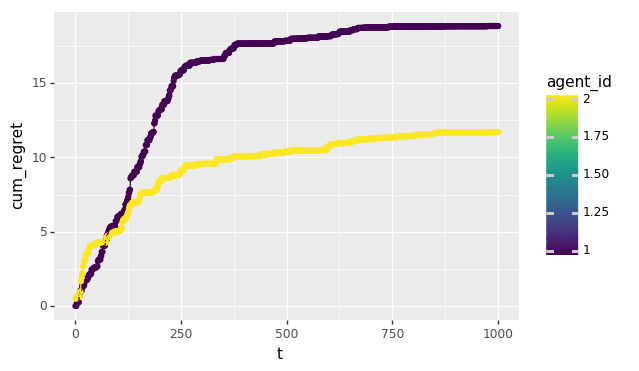

<ggplot: (8782306868609)>


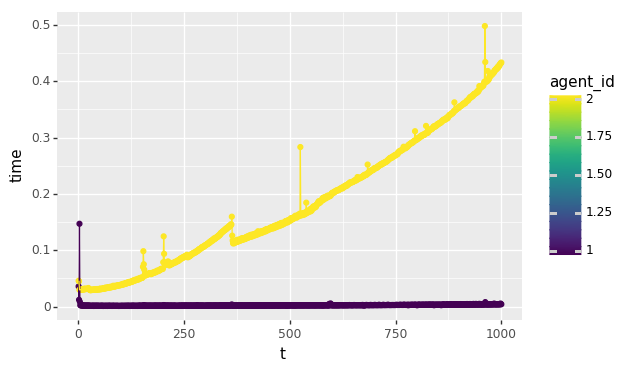

<ggplot: (8782307977085)>


In [6]:
name = 'logistic'
num_articles = 3
dim = 2
theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
#batch_size = 50
step_count=500 # number of langevin steps
step_size=0.01

alpha=0.2
beta=0.5
tol=0.0001

n_steps = 1000 #number of experiment steps

verbosity=1

results, df = simple_compare_laplace_langevin_nobias(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
                                   alpha, beta, tol, n_steps, seed=42, verbosity=verbosity)

#results, df = simple_compare_laplace_langevin(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
#                                   alpha, beta, tol, n_steps, seed=98, verbosity=1)



theta [1.76405235 0.40015721]


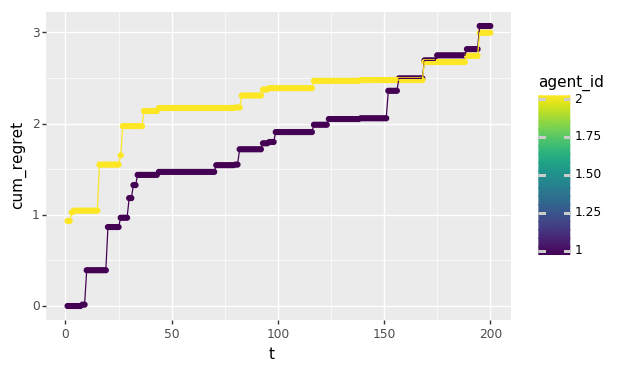

<ggplot: (8782263099541)>


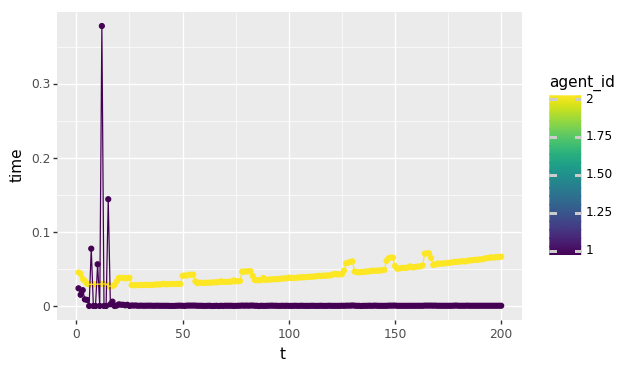

<ggplot: (8782263098137)>
theta [ 1.62434536 -0.61175641]


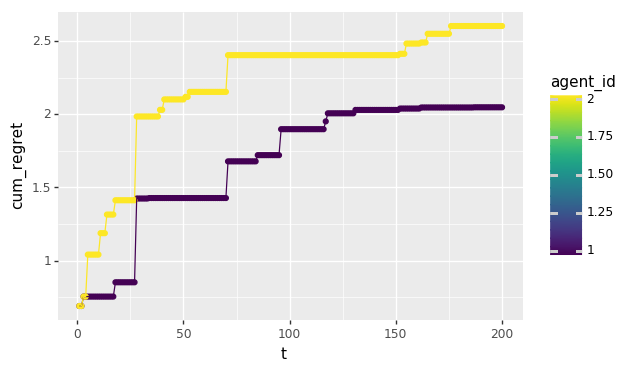

<ggplot: (8782263032097)>


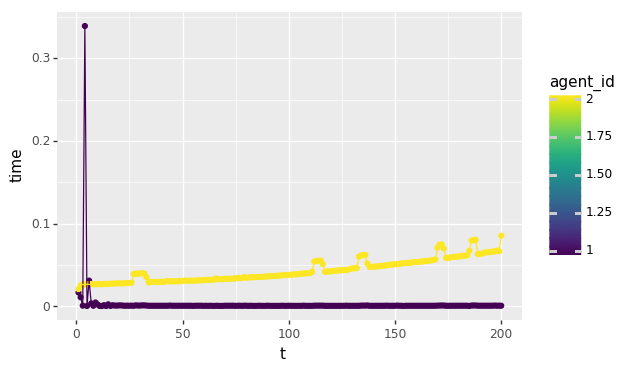

<ggplot: (8782262927709)>
theta [-0.41675785 -0.05626683]


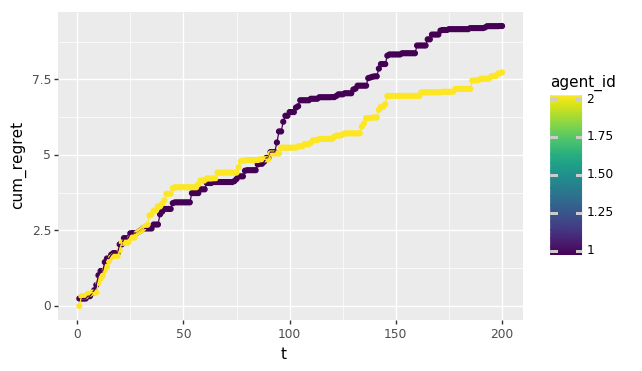

<ggplot: (8782262930441)>


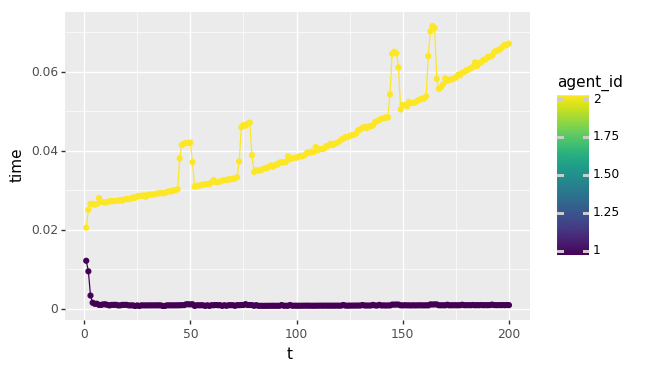

<ggplot: (8782306476773)>
theta [1.78862847 0.43650985]


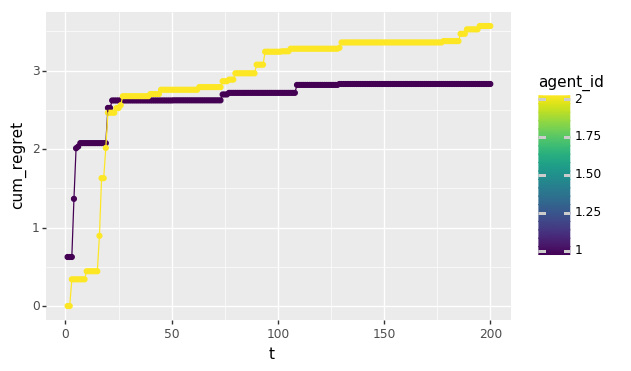

<ggplot: (8782262989653)>


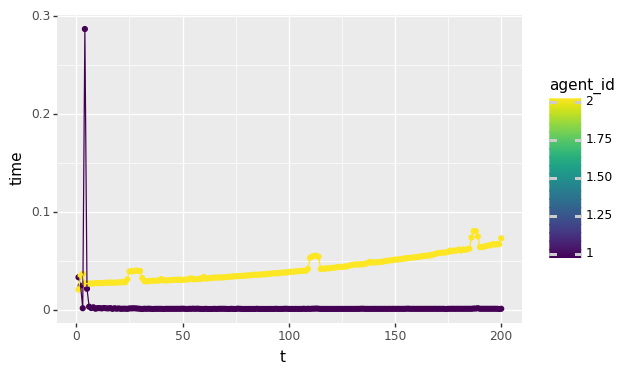

<ggplot: (8782262983973)>
theta [0.05056171 0.49995133]


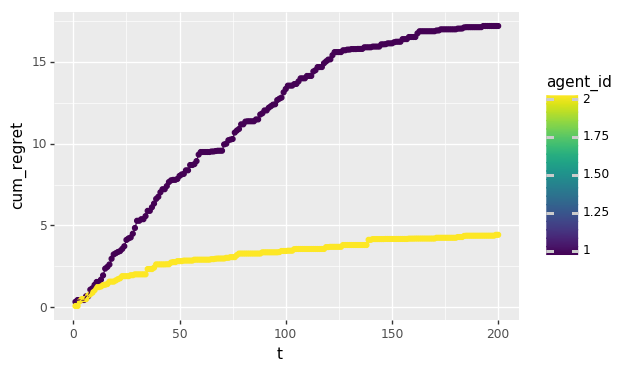

<ggplot: (8782306634913)>


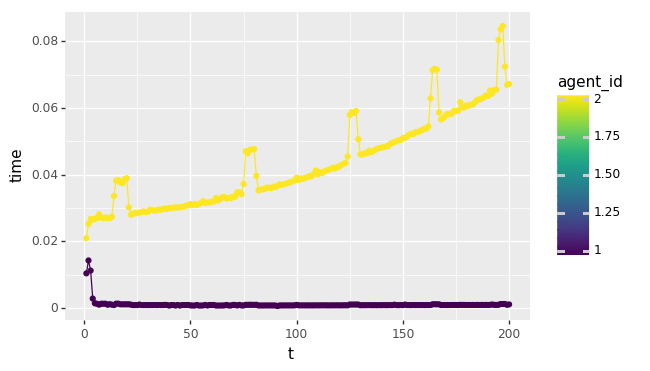

<ggplot: (8782306822069)>
theta [ 0.44122749 -0.33087015]


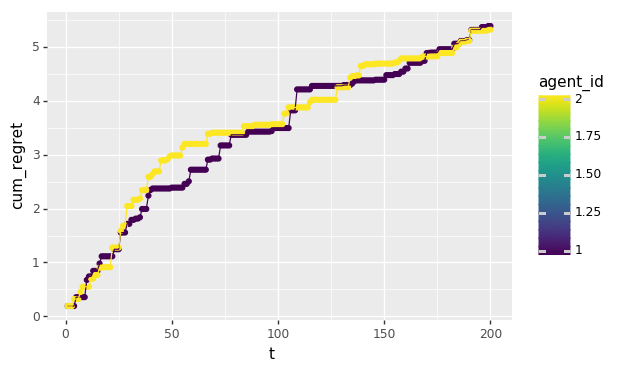

<ggplot: (8782306833245)>


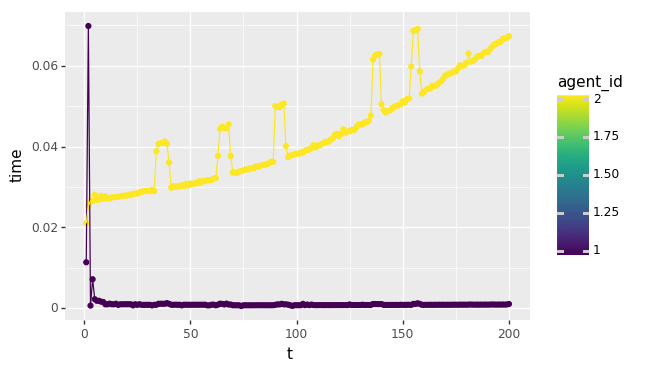

<ggplot: (8782306632081)>
theta [-0.31178367  0.72900392]


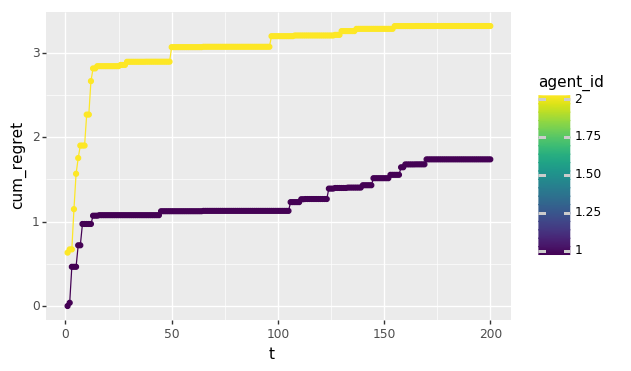

<ggplot: (8782306642601)>


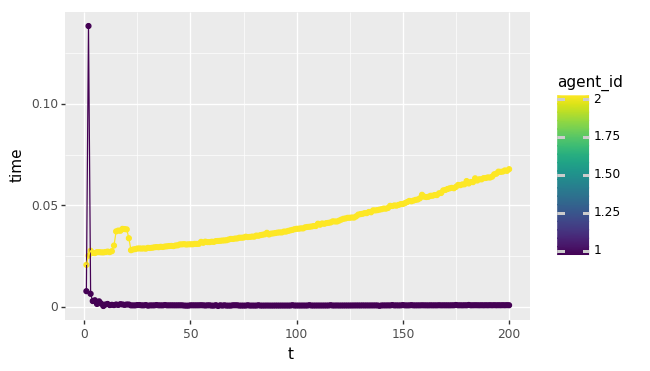

<ggplot: (8782263020489)>
theta [ 1.6905257  -0.46593737]


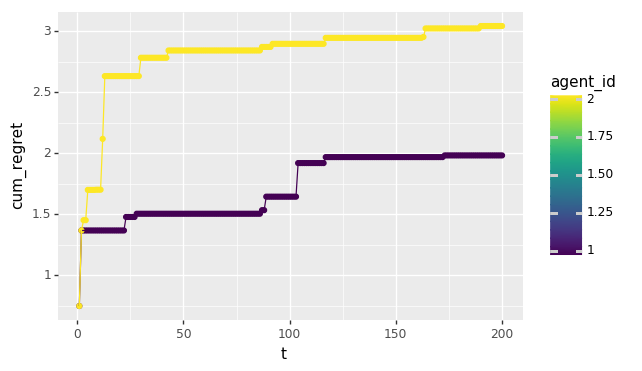

<ggplot: (8782306737389)>


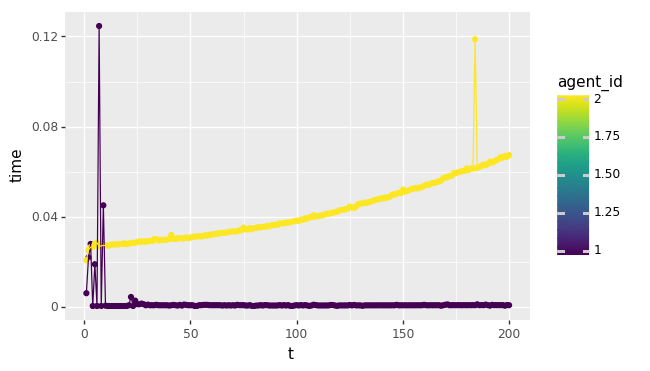

<ggplot: (8782307976977)>
theta [0.09120472 1.09128273]


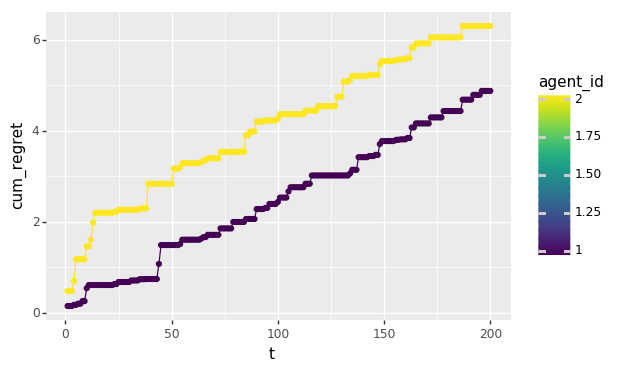

<ggplot: (8782340400137)>


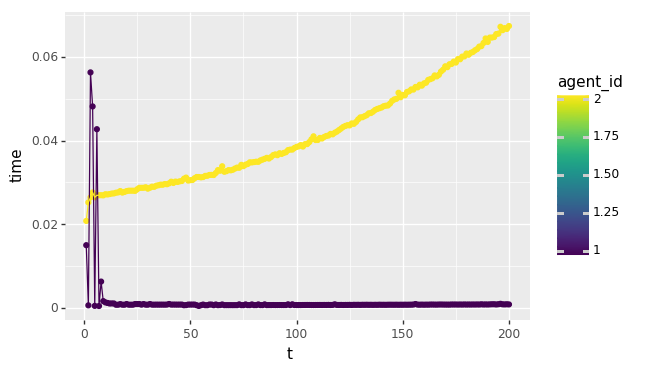

<ggplot: (8782306592337)>
theta [ 0.00110855 -0.28954407]


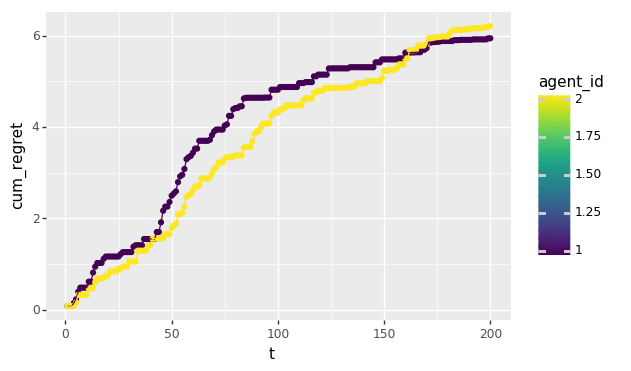

<ggplot: (8782306440421)>


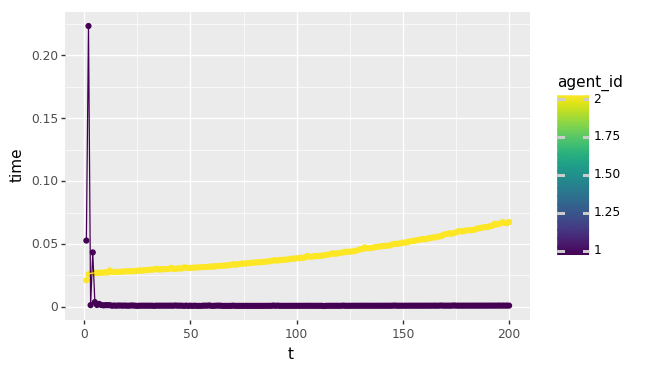

<ggplot: (8782306764701)>


In [10]:
name = 'logistic'
num_articles = 3
dim = 2
theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
#batch_size = 50
step_count=500 # number of langevin steps
step_size=0.01

alpha=0.2
beta=0.5
tol=0.0001

n_steps = 200 #number of experiment steps

verbosity=0

for seed in range(10):
    results, df = simple_compare_laplace_langevin_nobias(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
                                   alpha, beta, tol, n_steps, seed=seed, verbosity=verbosity)

#results, df = simple_compare_laplace_langevin(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
#                                   alpha, beta, tol, n_steps, seed=98, verbosity=1)



theta [1.76405235 0.40015721]


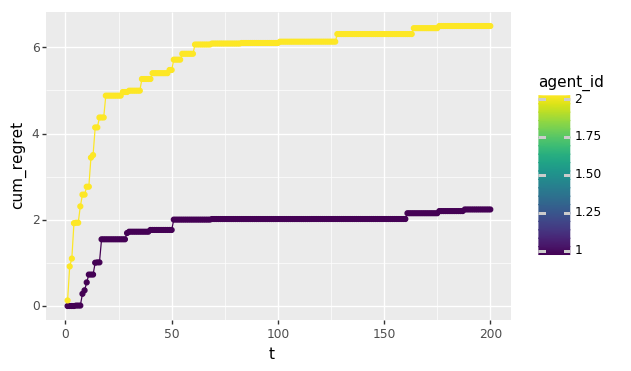

<ggplot: (8782306423713)>


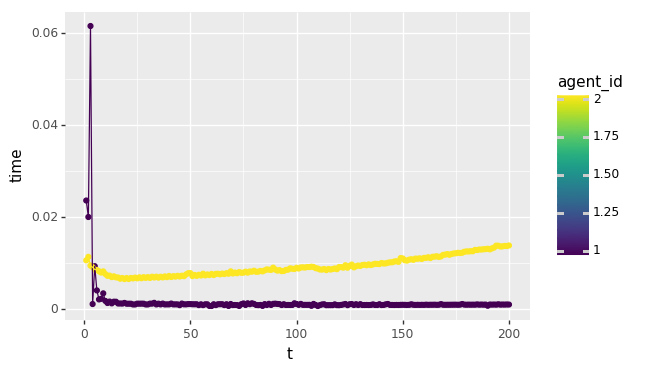

<ggplot: (8782233797009)>
theta [ 1.62434536 -0.61175641]


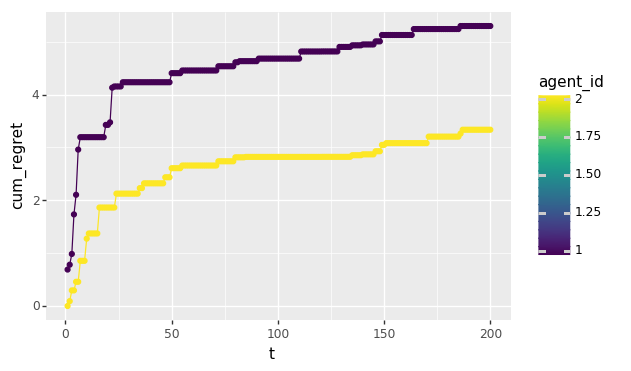

<ggplot: (8782219764665)>


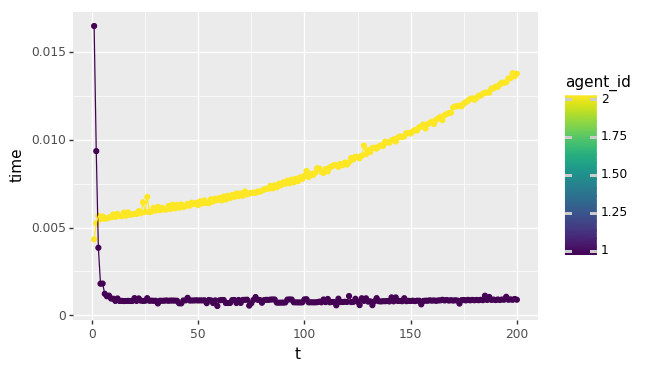

<ggplot: (8782306615193)>
theta [-0.41675785 -0.05626683]


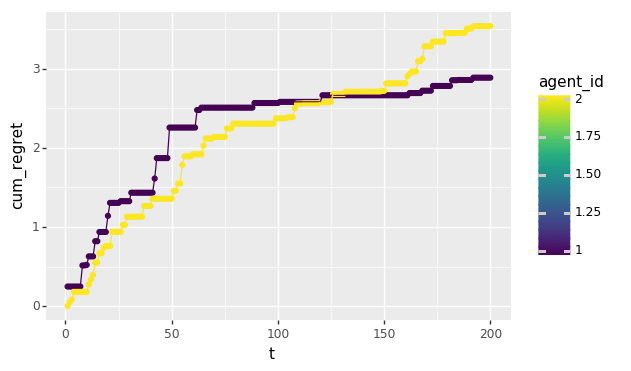

<ggplot: (8782306811673)>


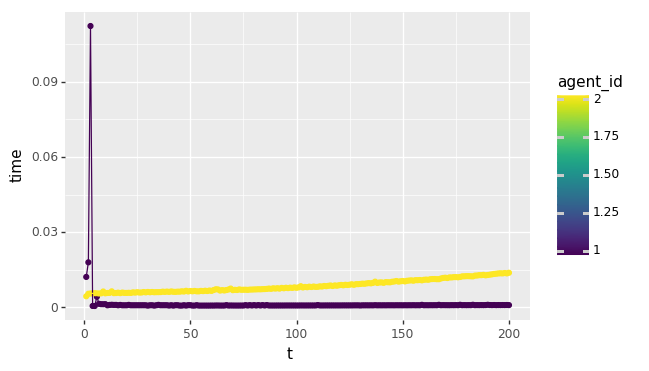

<ggplot: (8782306457453)>
theta [1.78862847 0.43650985]


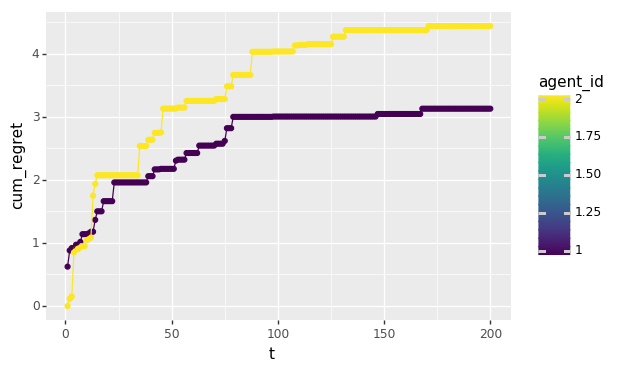

<ggplot: (8782306699093)>


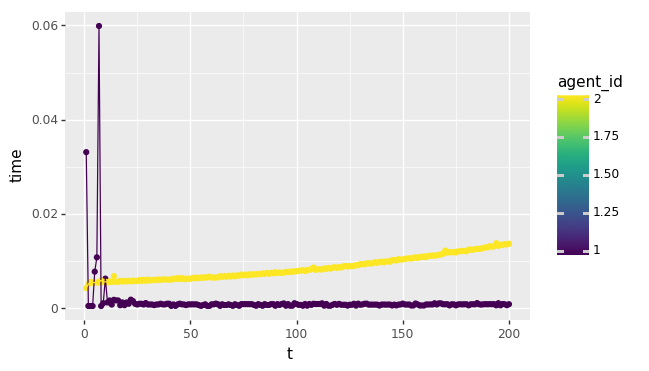

<ggplot: (8782306764617)>
theta [0.05056171 0.49995133]


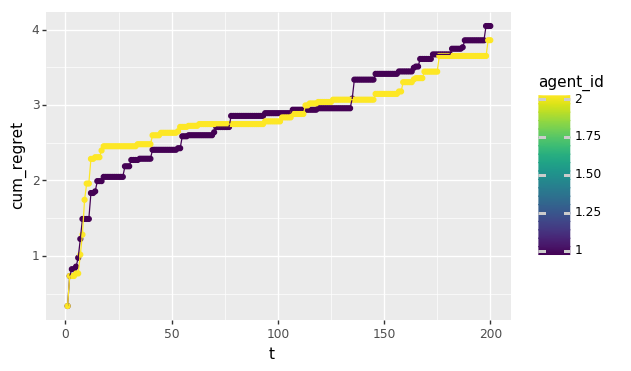

<ggplot: (8782306417925)>


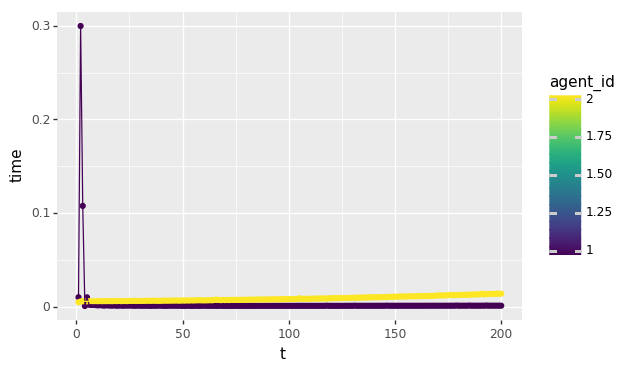

<ggplot: (8782306832485)>
theta [ 0.44122749 -0.33087015]


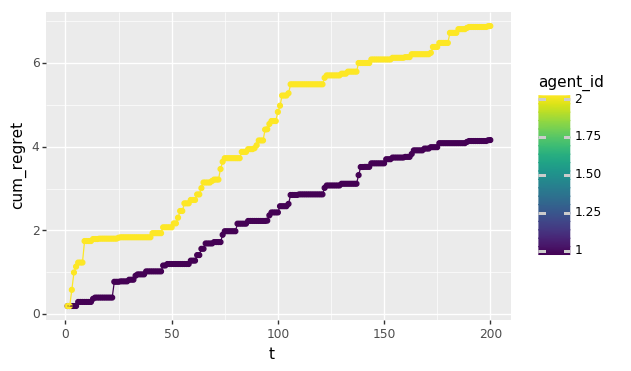

<ggplot: (8782306883293)>


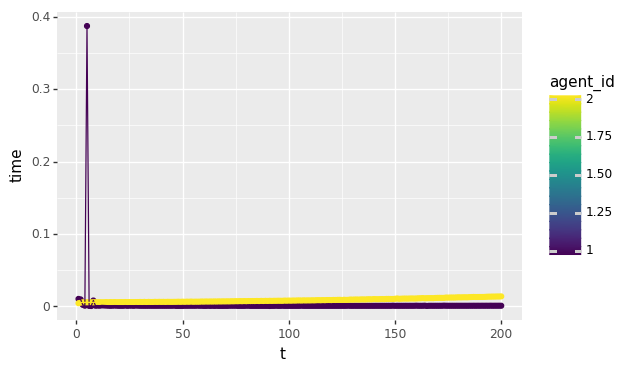

<ggplot: (8782306885013)>
theta [-0.31178367  0.72900392]


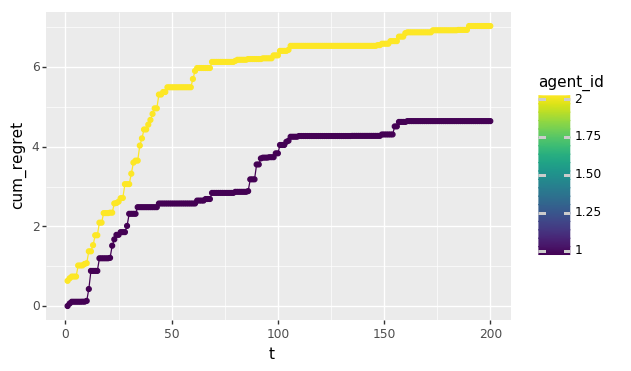

<ggplot: (8782262917161)>


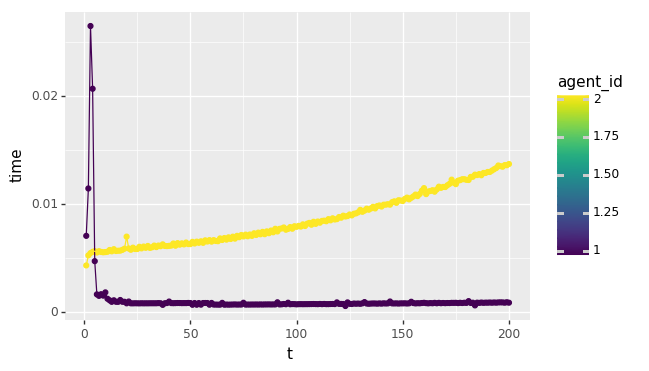

<ggplot: (8782306640545)>
theta [ 1.6905257  -0.46593737]


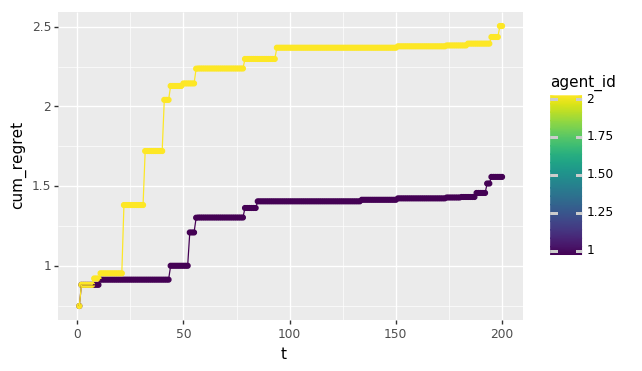

<ggplot: (8782306458001)>


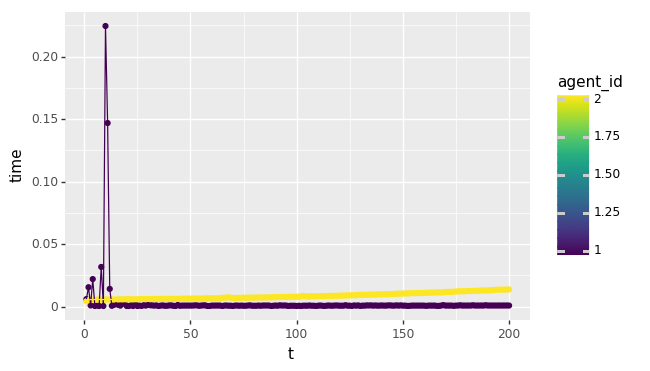

<ggplot: (8782306752437)>
theta [0.09120472 1.09128273]


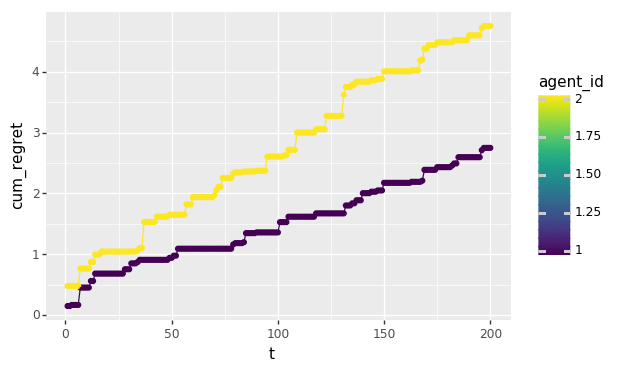

<ggplot: (8782306421593)>


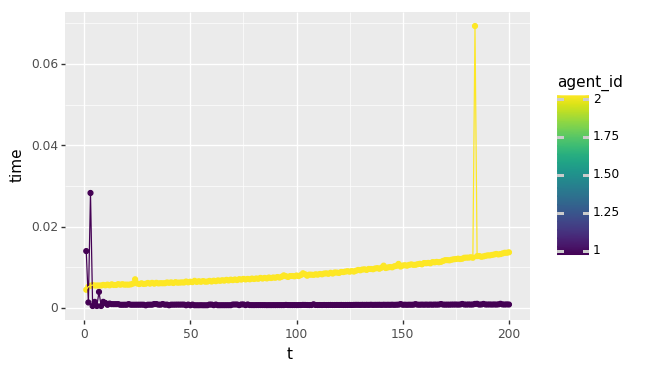

<ggplot: (8782306754085)>
theta [ 0.00110855 -0.28954407]


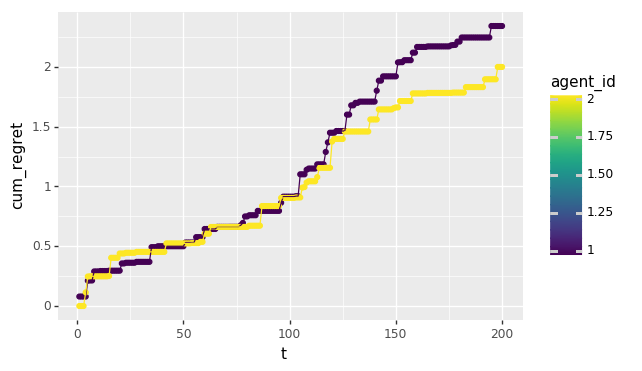

<ggplot: (8782306421625)>


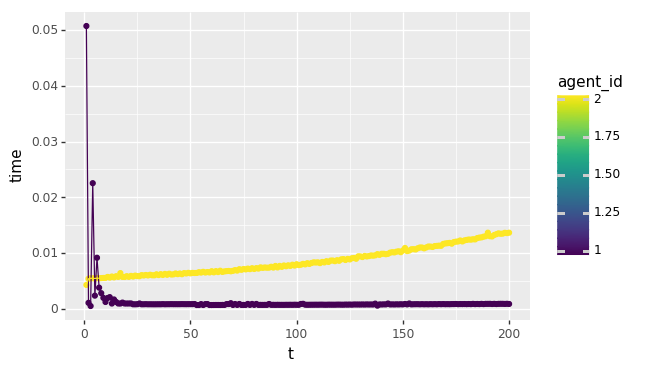

<ggplot: (8782263002341)>


In [11]:
name = 'logistic'
num_articles = 3
dim = 2
theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
#batch_size = 50
step_count=100 # number of langevin steps
step_size=0.1

alpha=0.2
beta=0.5
tol=0.0001

n_steps = 200 #number of experiment steps

verbosity=0

for seed in range(10):
    results, df = simple_compare_laplace_langevin_nobias(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
                                   alpha, beta, tol, n_steps, seed=seed, verbosity=verbosity)

#results, df = simple_compare_laplace_langevin(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
#                                   alpha, beta, tol, n_steps, seed=98, verbosity=1)



theta [1.76405235 0.40015721]


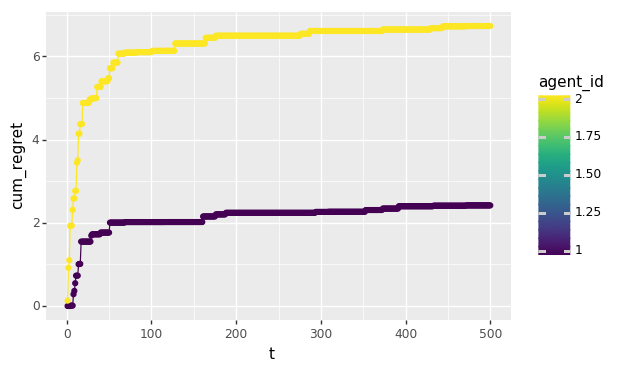

<ggplot: (8782306473277)>


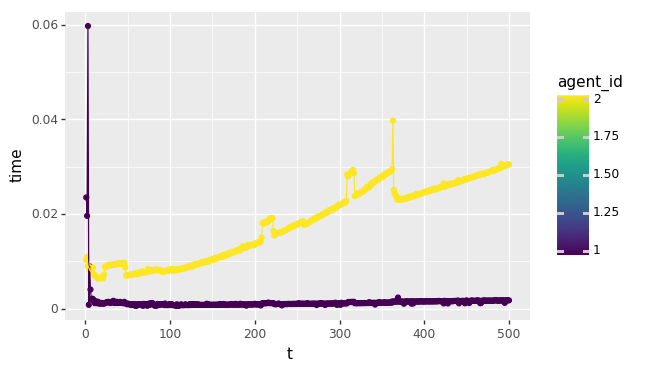

<ggplot: (8782306618361)>
theta [ 1.62434536 -0.61175641]


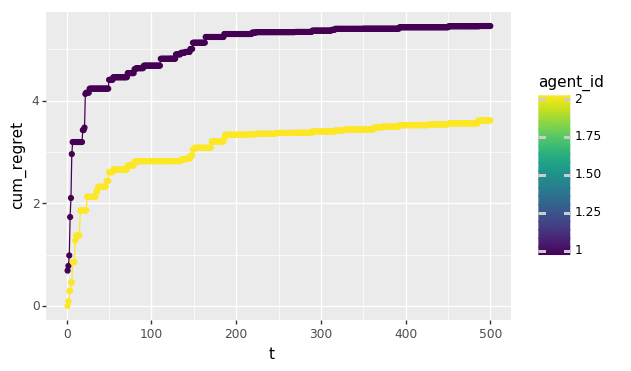

<ggplot: (8782306495229)>


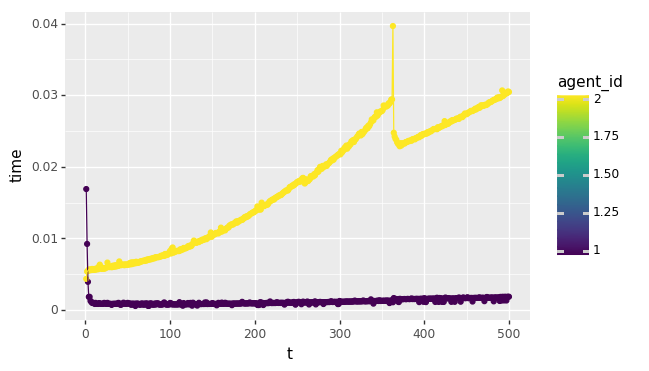

<ggplot: (8782306474533)>
theta [-0.41675785 -0.05626683]


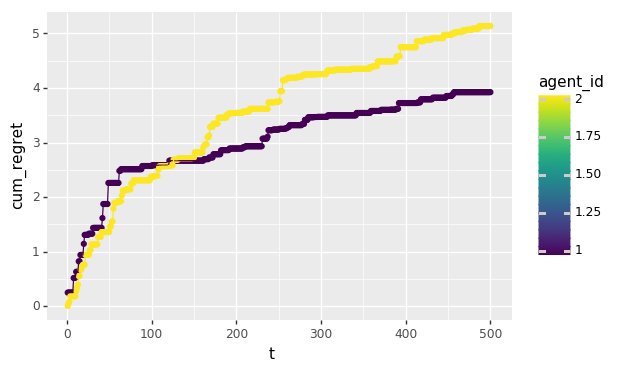

<ggplot: (8782306811561)>


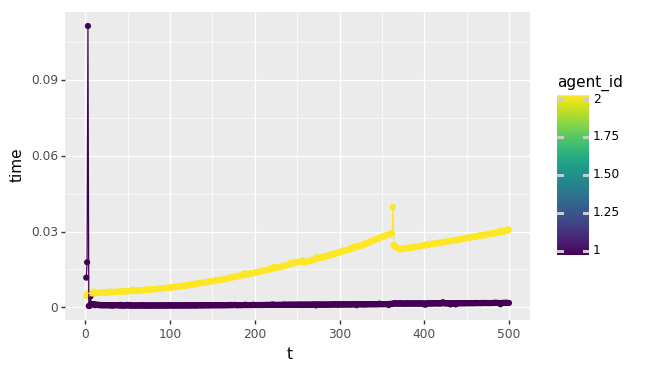

<ggplot: (8782306678305)>
theta [1.78862847 0.43650985]


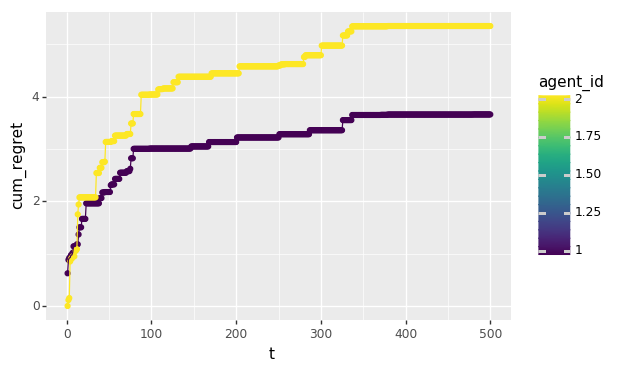

<ggplot: (8782263014965)>


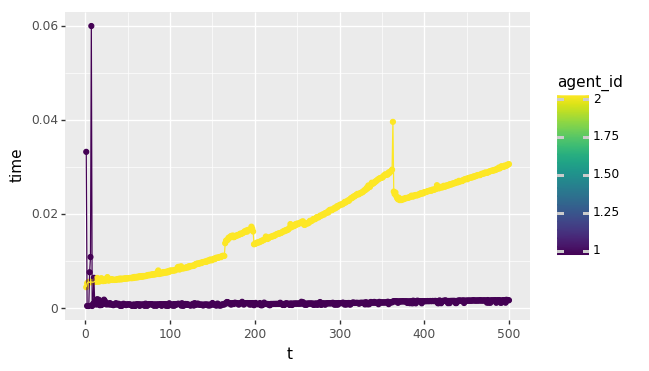

<ggplot: (8782306569805)>
theta [0.05056171 0.49995133]


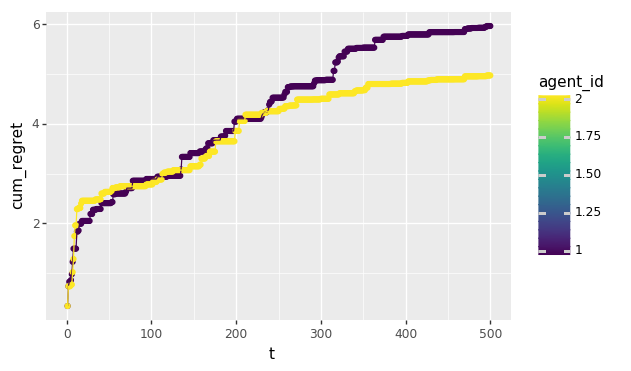

<ggplot: (8782262995761)>


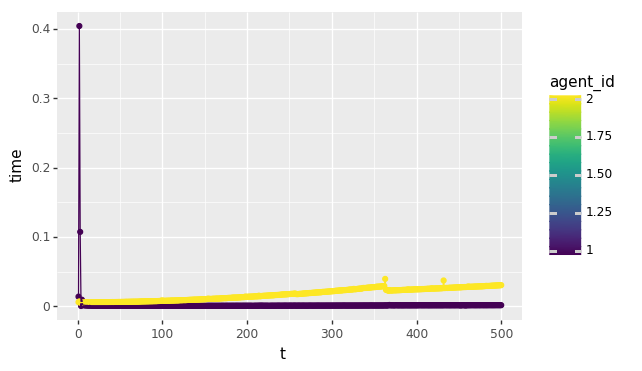

<ggplot: (8782306419789)>
theta [ 0.44122749 -0.33087015]


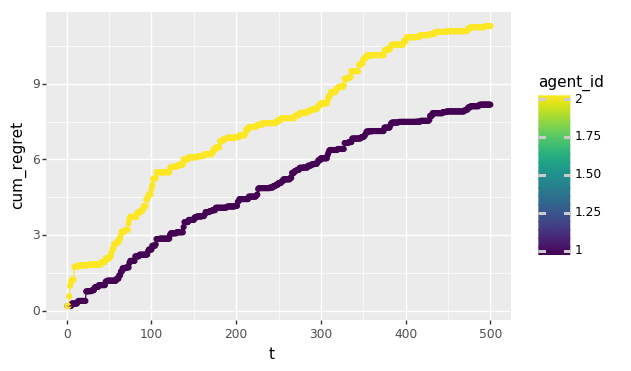

<ggplot: (8782306645069)>


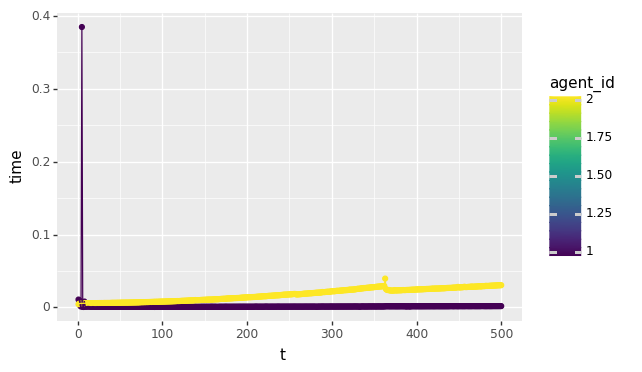

<ggplot: (8782306879617)>
theta [-0.31178367  0.72900392]


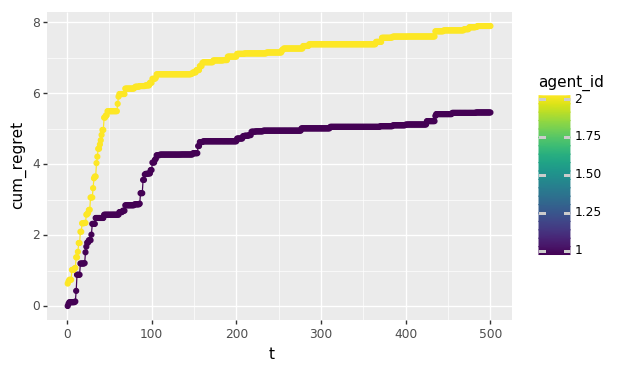

<ggplot: (8782262977289)>


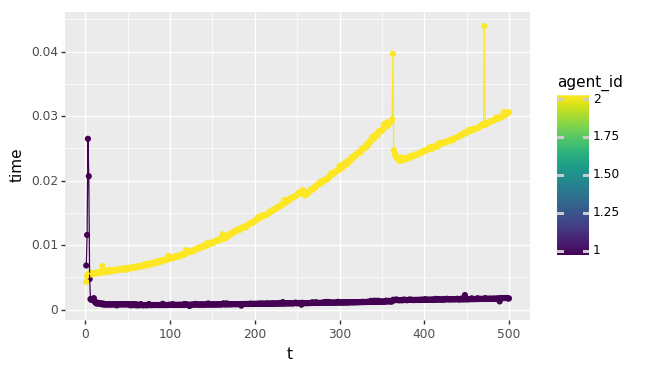

<ggplot: (8782306464053)>
theta [ 1.6905257  -0.46593737]


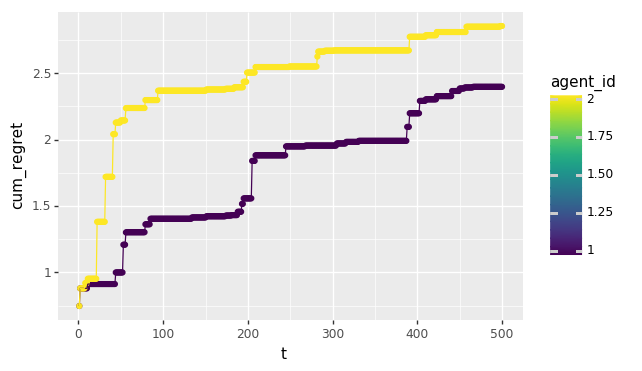

<ggplot: (8782306669777)>


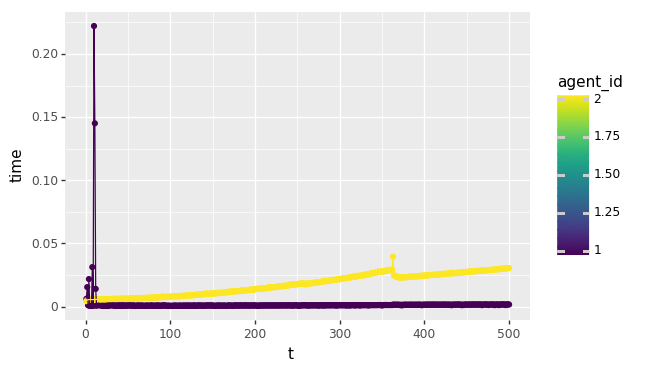

<ggplot: (8782262965449)>
theta [0.09120472 1.09128273]


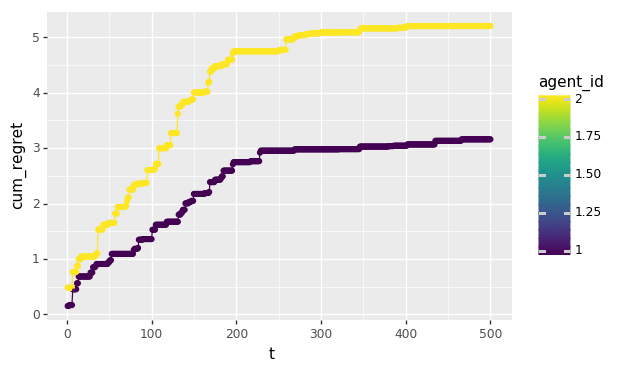

<ggplot: (8782306833681)>


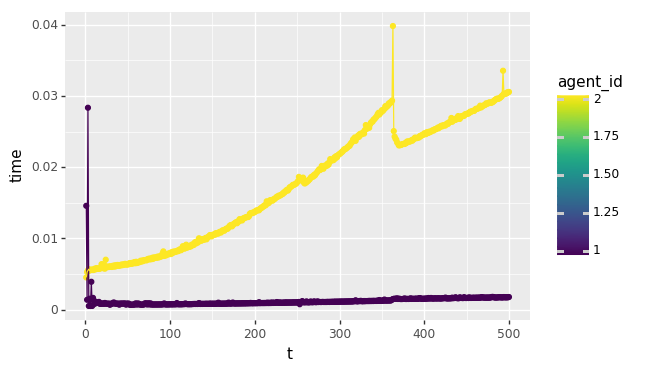

<ggplot: (8782306500253)>
theta [ 0.00110855 -0.28954407]


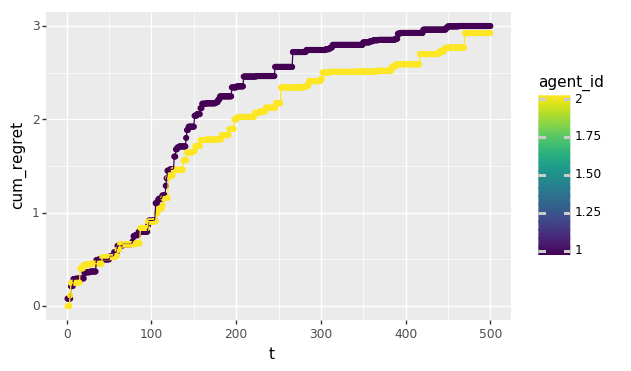

<ggplot: (8782306703357)>


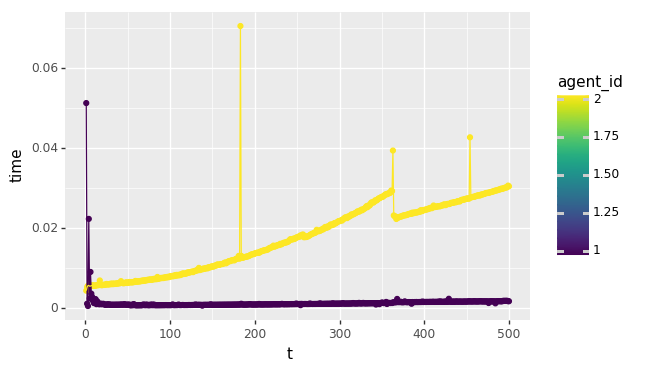

<ggplot: (8782306771737)>


In [12]:
name = 'logistic'
num_articles = 3
dim = 2
theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
#batch_size = 50
step_count=100 # number of langevin steps
step_size=0.1

alpha=0.2
beta=0.5
tol=0.0001

n_steps = 500 #number of experiment steps

verbosity=0

for seed in range(10):
    results, df = simple_compare_laplace_langevin_nobias(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
                                   alpha, beta, tol, n_steps, seed=seed, verbosity=verbosity)

#results, df = simple_compare_laplace_langevin(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
#                                   alpha, beta, tol, n_steps, seed=98, verbosity=1)



theta [1.76405235 0.40015721]


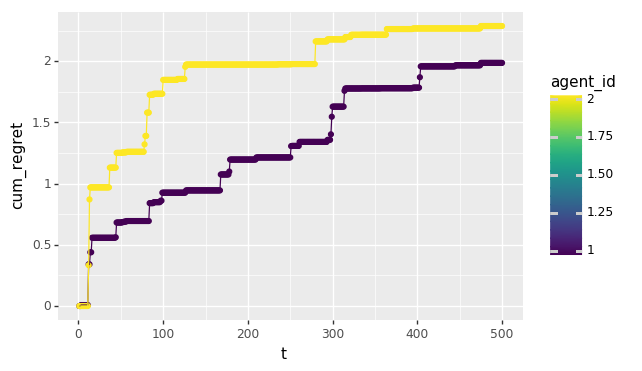

<ggplot: (8782306492373)>


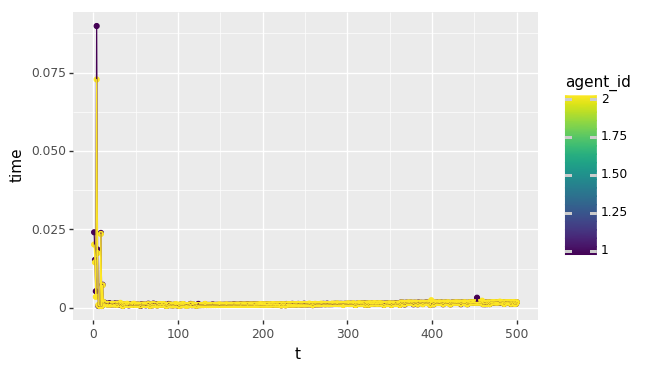

<ggplot: (8782306782365)>
theta [ 1.62434536 -0.61175641]


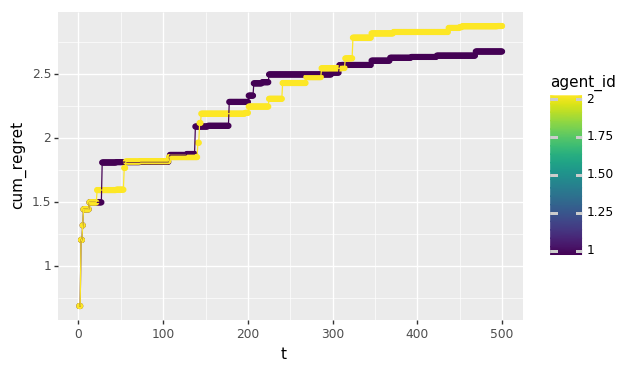

<ggplot: (8782306782365)>


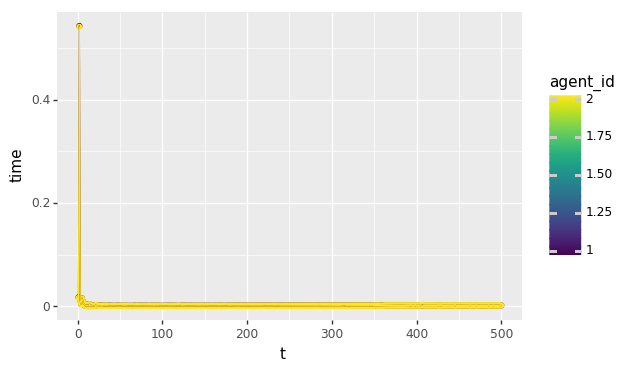

<ggplot: (8782306559229)>
theta [-0.41675785 -0.05626683]


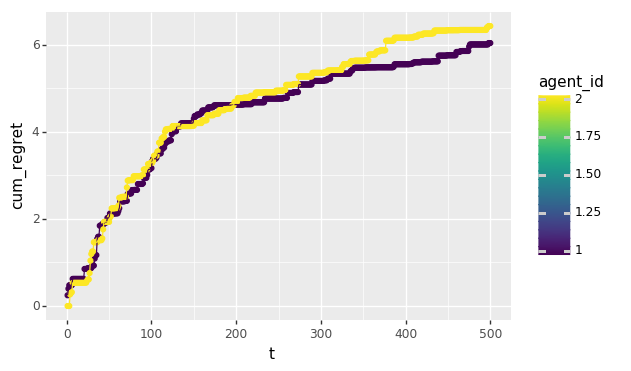

<ggplot: (8782306491953)>


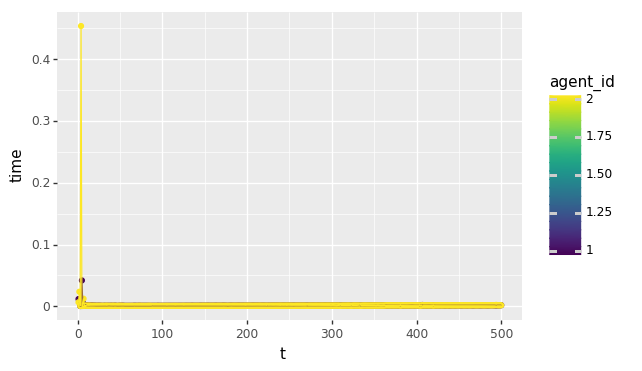

<ggplot: (8782306486809)>
theta [1.78862847 0.43650985]


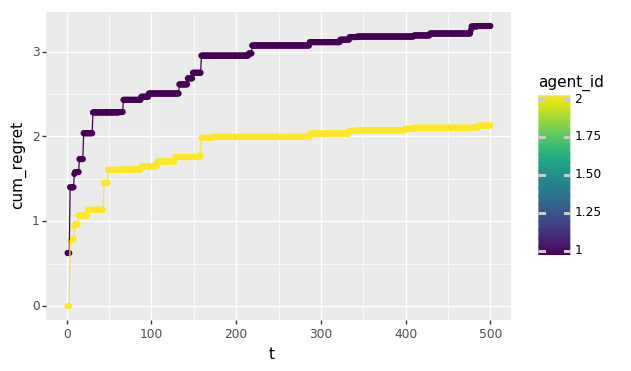

<ggplot: (8782262971161)>


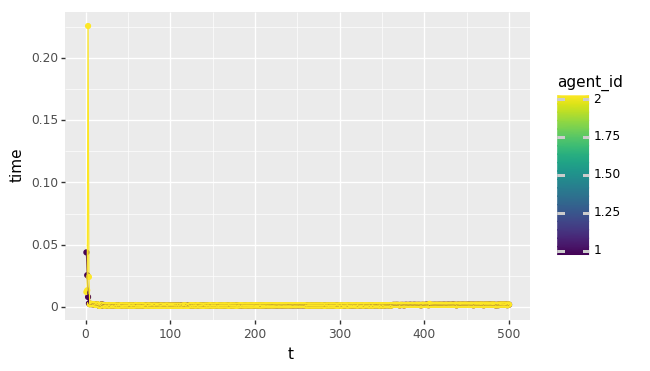

<ggplot: (8782306823457)>
theta [0.05056171 0.49995133]


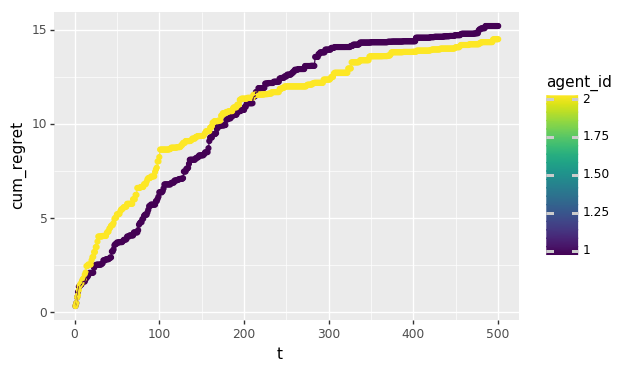

<ggplot: (8782306769289)>


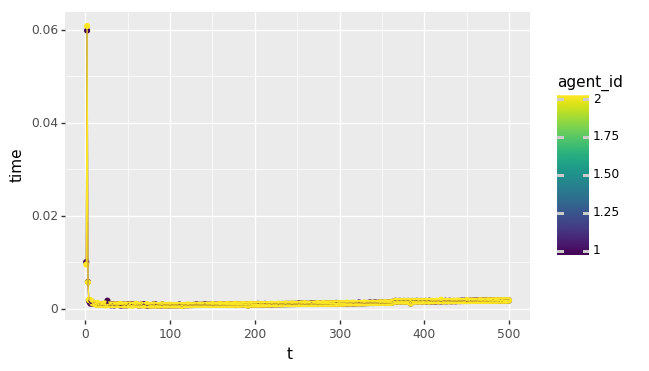

<ggplot: (8782306529341)>
theta [ 0.44122749 -0.33087015]


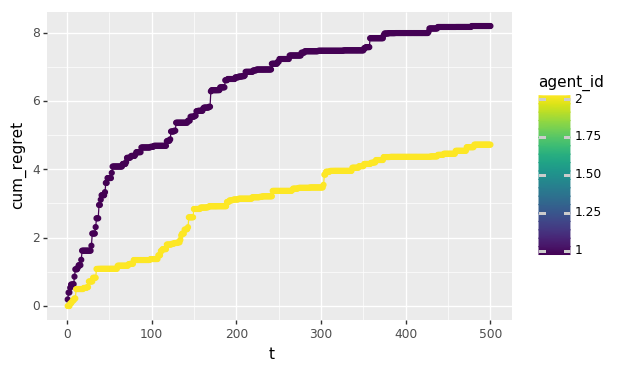

<ggplot: (8782306689397)>


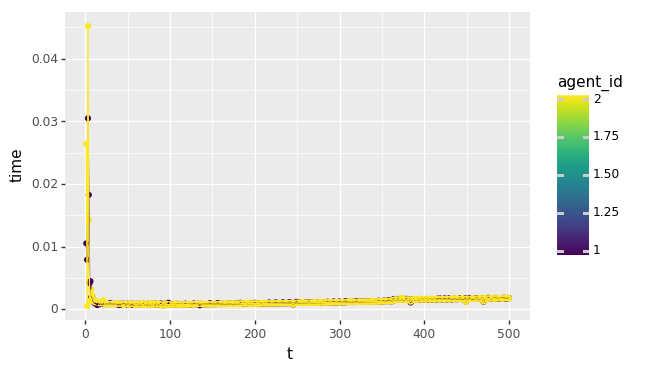

<ggplot: (8782306531897)>
theta [-0.31178367  0.72900392]


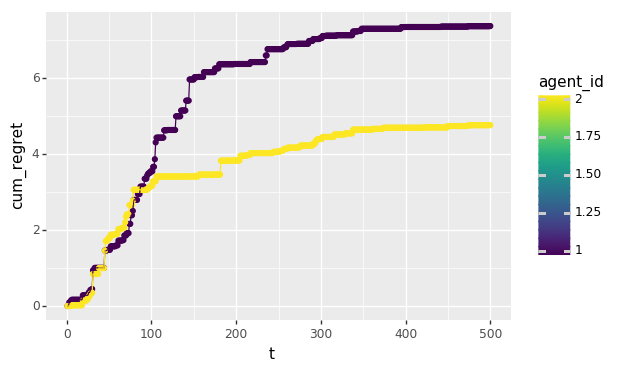

<ggplot: (8782342274037)>


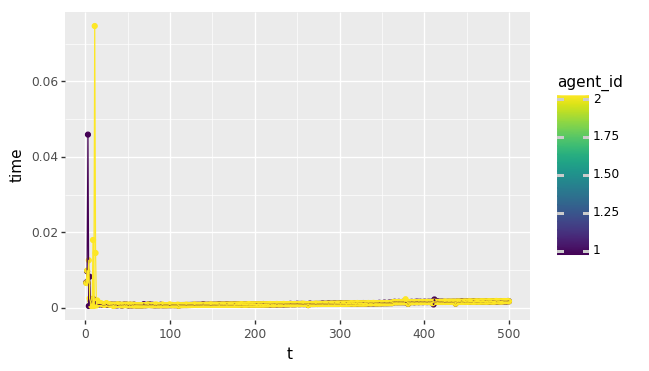

<ggplot: (8782306782581)>
theta [ 1.6905257  -0.46593737]


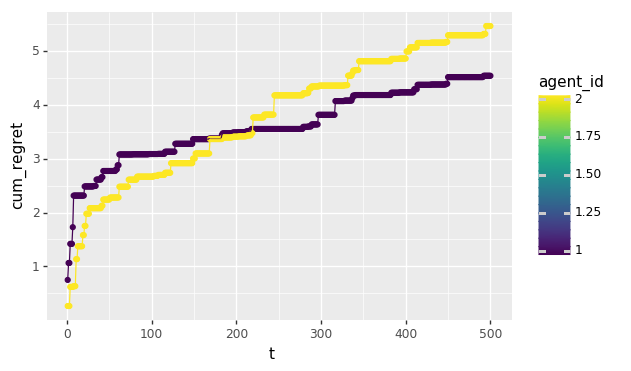

<ggplot: (8782306704669)>


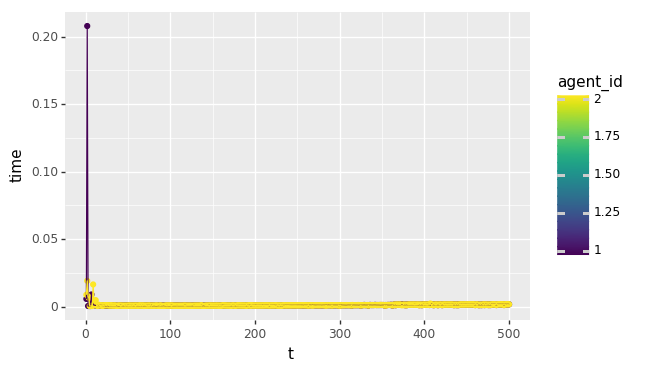

<ggplot: (8782306806749)>
theta [0.09120472 1.09128273]


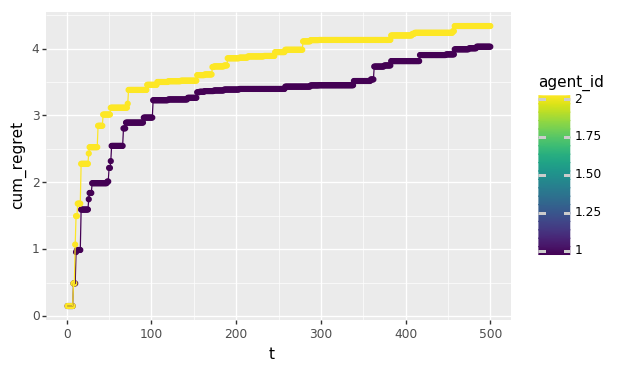

<ggplot: (8782262903681)>


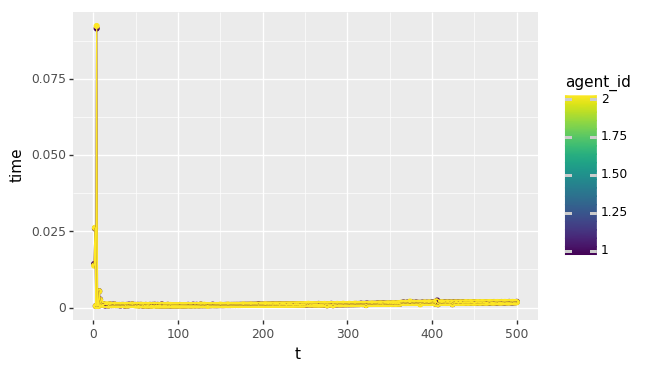

<ggplot: (8782306823829)>
theta [ 0.00110855 -0.28954407]


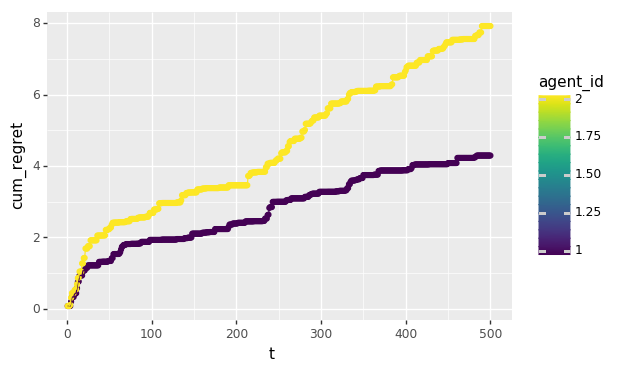

<ggplot: (8782306457777)>


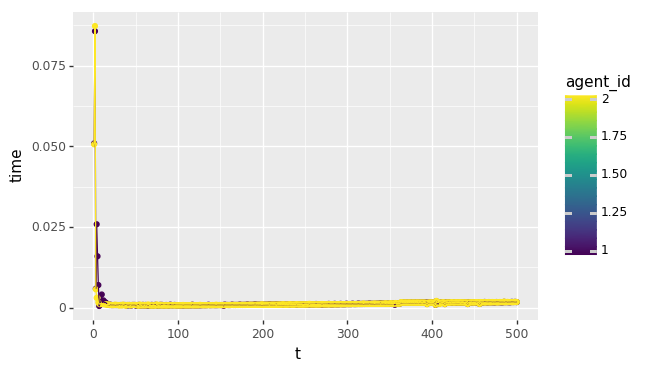

<ggplot: (8782306740377)>


In [13]:
def simple_compare_laplace_laplace_nobias(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
                                   alpha, beta, tol, n_steps, seed=0, verbosity=0):
    laplace_agent = LaplaceTSLogisticBandit(num_articles, dim, theta_mean, theta_std, epsilon1,
                          alpha,beta,tol, verbosity=verbosity)
    laplace_agent2 = LaplaceTSLogisticBandit(num_articles, dim, theta_mean, theta_std, epsilon1,
                          alpha,beta,tol, verbosity=verbosity)
    agents = [laplace_agent, laplace_agent2]
    env = LogisticBandit(num_articles, dim, None, NormalDist(0,1,dim=dim), seed=seed)
    experiment = ExperimentCompare(agents, env, n_steps,
                   seed=seed, verbosity=verbosity) #, rec_freq=1, unique_id='NULL')
    experiment.run_experiment()
    results = []
    results.append(experiment.results)
    df = pd.DataFrame(results[0])
    print(gg.ggplot(df)
     + gg.aes('t', 'cum_regret', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    print(gg.ggplot(df)
     + gg.aes('t', 'time', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    return results, df
for seed in range(10):
    results, df = simple_compare_laplace_laplace_nobias(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
                                   alpha, beta, tol, n_steps, seed=seed, verbosity=verbosity)

In [23]:
def simple_compare_laplace_laplace_nobias(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
                                   alpha, beta, tol, n_steps, seed=0, var=1, verbosity=0):
    agents = [LaplaceTSLogisticBandit(num_articles, dim, theta_mean, theta_std, epsilon1,
                          alpha,beta,tol, verbosity=verbosity) for i in range(10)]
    env = LogisticBandit(num_articles, dim, None, NormalDist(0,var,dim=dim), seed=seed)
    experiment = ExperimentCompare(agents, env, n_steps,
                   seed=seed, verbosity=verbosity) #, rec_freq=1, unique_id='NULL')
    experiment.run_experiment()
    results = []
    results.append(experiment.results)
    df = pd.DataFrame(results[0])
    print(gg.ggplot(df)
     + gg.aes('t', 'cum_regret', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    print(gg.ggplot(df)
     + gg.aes('t', 'time', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    return results, df

theta [1.76405235 0.40015721]


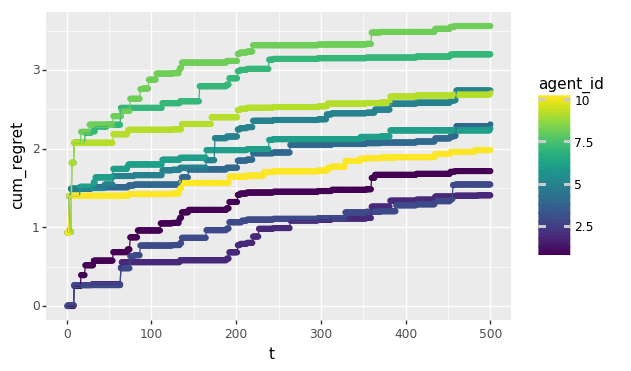

<ggplot: (8782306662129)>


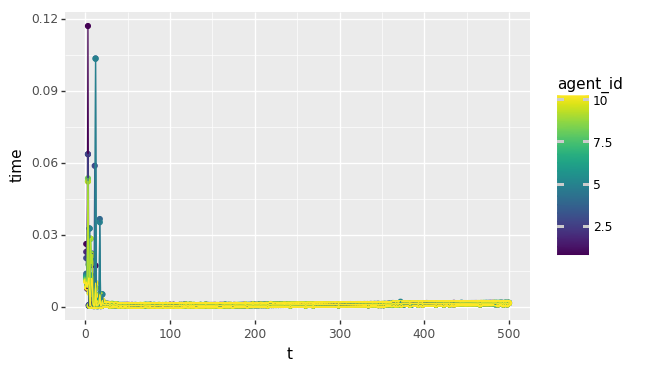

<ggplot: (8782306662017)>
theta [ 1.62434536 -0.61175641]


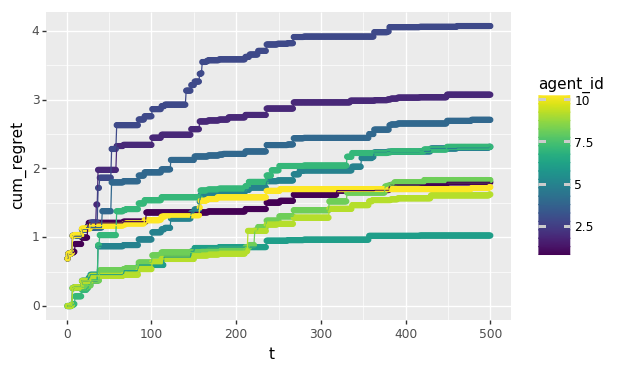

<ggplot: (8782306632157)>


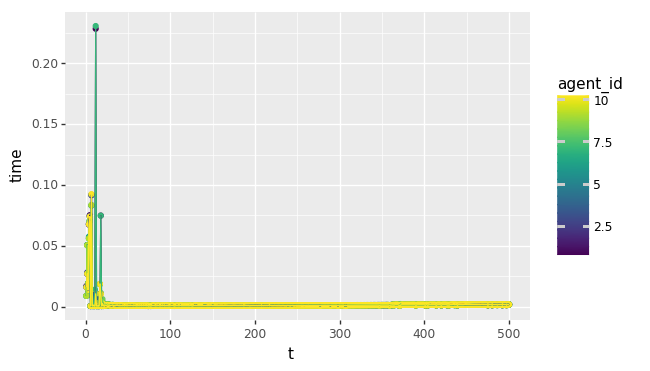

<ggplot: (8782306766609)>


In [14]:

for seed in range(2):
    results, df = simple_compare_laplace_laplace_nobias(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
                                   alpha, beta, tol, n_steps, seed=seed, verbosity=verbosity)

In [26]:
def simple_compare_langevin_nobias(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
                                   alpha, beta, tol, n_steps, seed=0, var=1, verbosity=0):
    agents = [BasicLangevinTS(num_articles, dim, [0]*dim, cov=None, step_size=step_size, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity) for i in range(10)]
    env = LogisticBandit(num_articles, dim, None, NormalDist(0,var,dim=dim), seed=seed)
    experiment = ExperimentCompare(agents, env, n_steps,
                   seed=seed, verbosity=verbosity) #, rec_freq=1, unique_id='NULL')
    experiment.run_experiment()
    results = []
    results.append(experiment.results)
    df = pd.DataFrame(results[0])
    print(gg.ggplot(df)
     + gg.aes('t', 'cum_regret', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    print(gg.ggplot(df)
     + gg.aes('t', 'time', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    return results, df

theta [1.76405235 0.40015721]


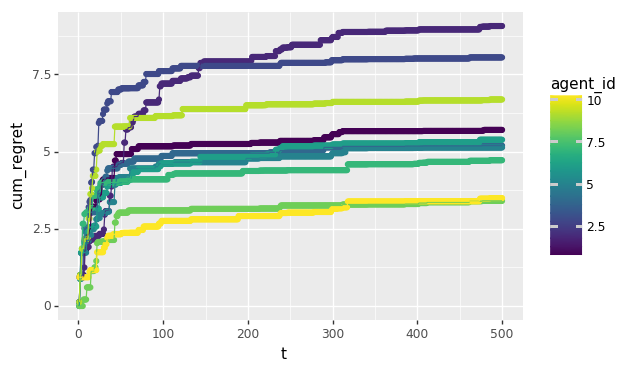

<ggplot: (8782306879609)>


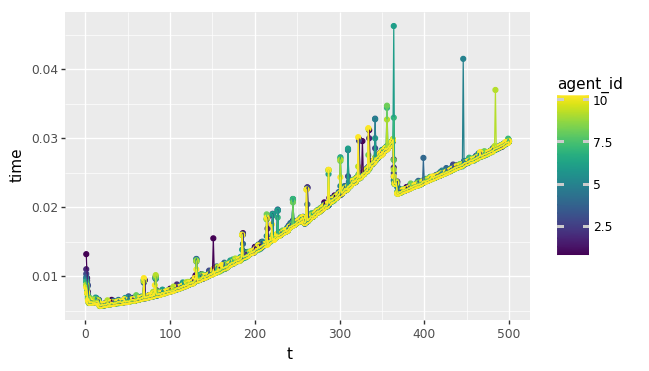

<ggplot: (8782306749225)>
theta [ 1.62434536 -0.61175641]


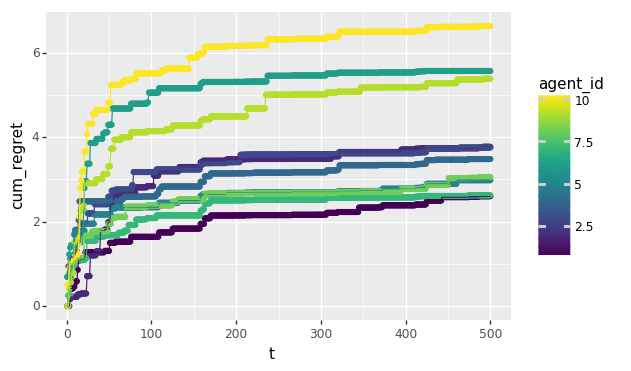

<ggplot: (8782262928497)>


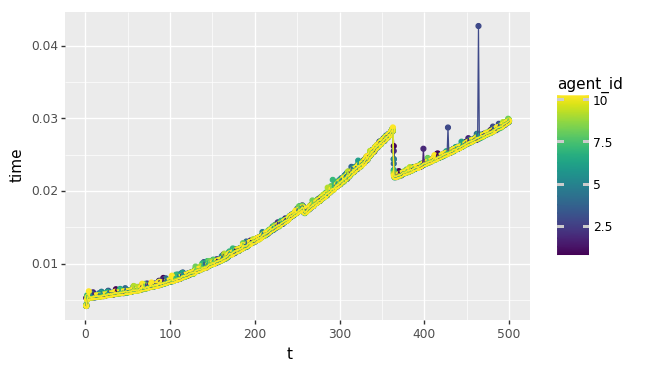

<ggplot: (8782306588393)>


In [15]:

for seed in range(2):
    results, df = simple_compare_langevin_nobias(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
                                   alpha, beta, tol, n_steps, seed=seed, verbosity=verbosity)

Conclusion:

This comparison isn't so meaningful, since there is lots of variation within the same sampling algorithm.


# more-D

theta [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574]


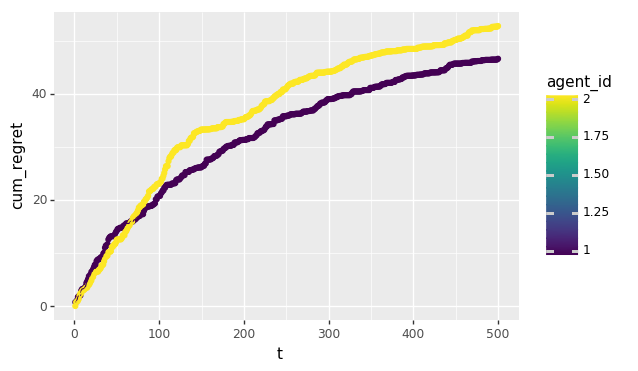

<ggplot: (8782306766757)>


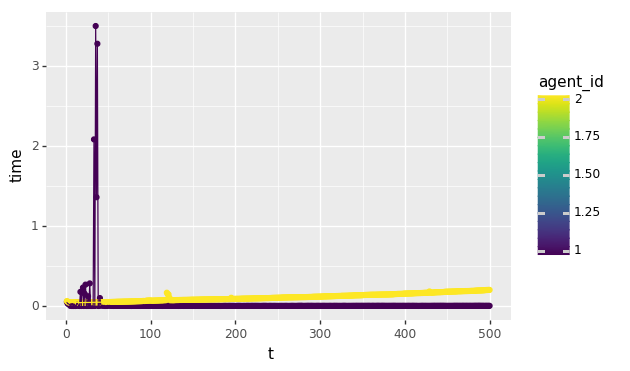

<ggplot: (8782342274021)>
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
  0.04221375  0.58281521]


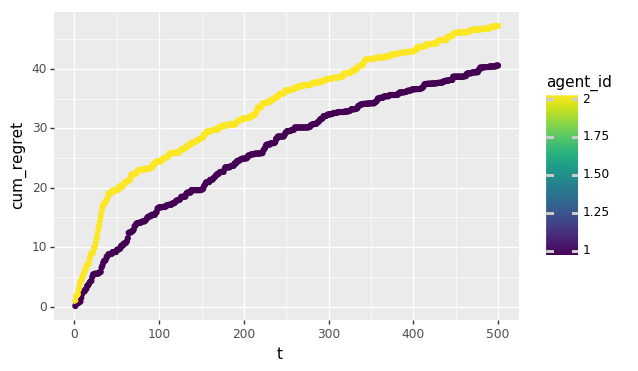

<ggplot: (8782262805409)>


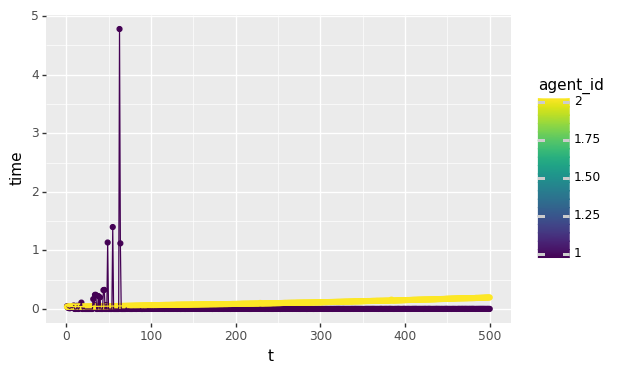

<ggplot: (8782262654733)>
theta [-0.41675785 -0.05626683 -2.1361961   1.64027081 -1.79343559 -0.84174737
  0.50288142 -1.24528809 -1.05795222 -0.90900761  0.55145404  2.29220801
  0.04153939 -1.11792545  0.53905832 -0.5961597  -0.0191305   1.17500122
 -0.74787095  0.00902525]


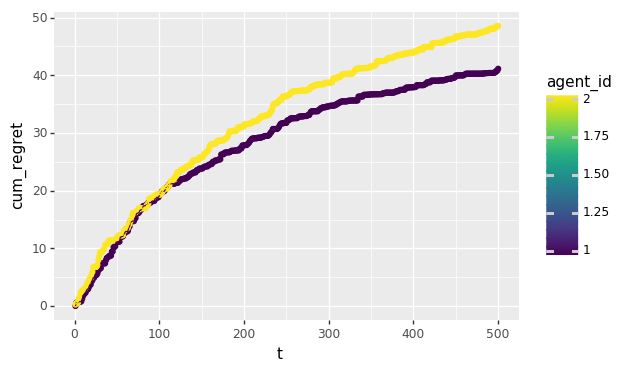

<ggplot: (8782262601165)>


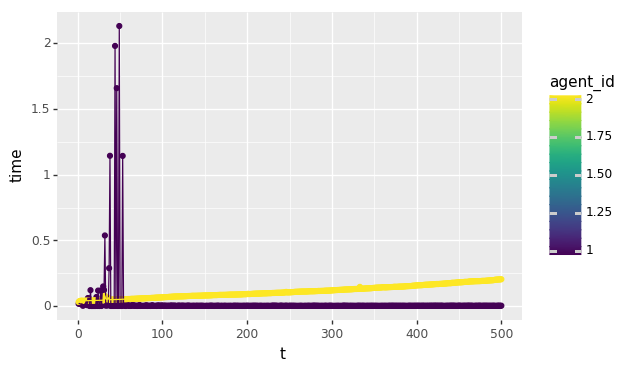

<ggplot: (8782262553309)>
theta [ 1.78862847  0.43650985  0.09649747 -1.8634927  -0.2773882  -0.35475898
 -0.08274148 -0.62700068 -0.04381817 -0.47721803 -1.31386475  0.88462238
  0.88131804  1.70957306  0.05003364 -0.40467741 -0.54535995 -1.54647732
  0.98236743 -1.10106763]


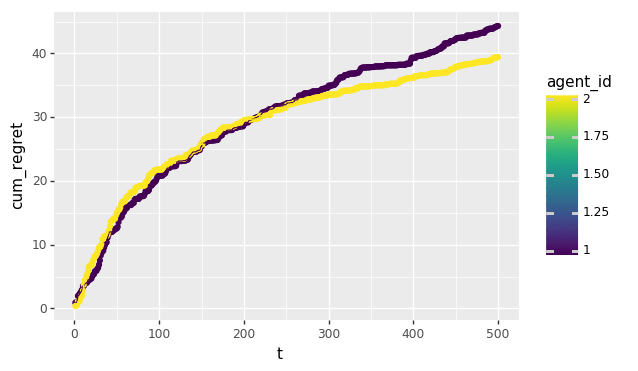

<ggplot: (8782262507013)>


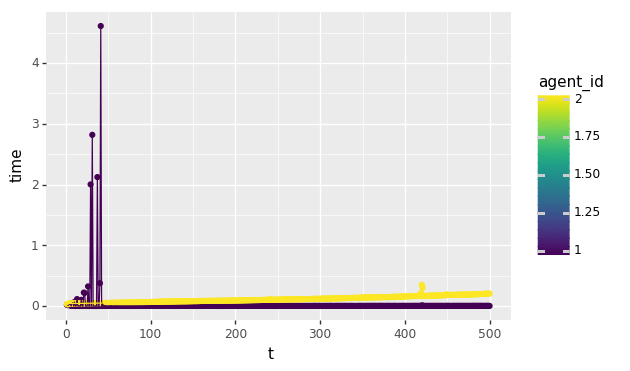

<ggplot: (8782262456881)>
theta [ 0.05056171  0.49995133 -0.99590893  0.69359851 -0.41830152 -1.58457724
 -0.64770677  0.59857517  0.33225003 -1.14747663  0.61866969 -0.08798693
  0.4250724   0.33225315 -1.15681626  0.35099715 -0.60688728  1.54697933
  0.72334161  0.04613557]


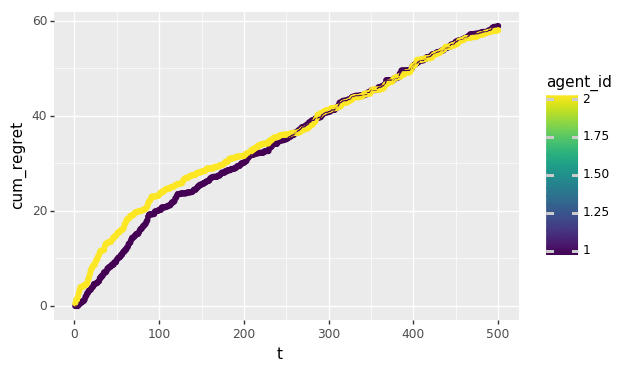

<ggplot: (8782262406349)>


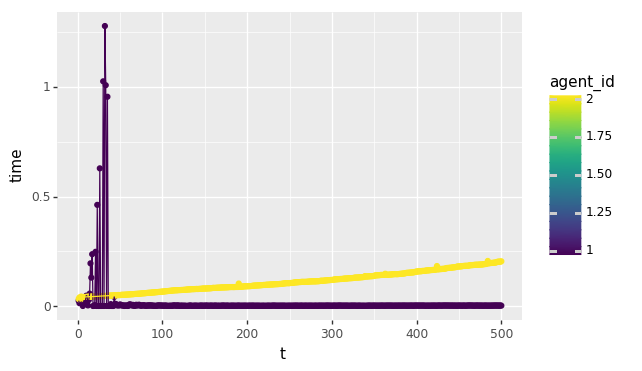

<ggplot: (8782262591089)>
theta [ 0.44122749 -0.33087015  2.43077119 -0.25209213  0.10960984  1.58248112
 -0.9092324  -0.59163666  0.18760323 -0.32986996 -1.19276461 -0.20487651
 -0.35882895  0.6034716  -1.66478853 -0.70017904  1.15139101  1.85733101
 -1.51117956  0.64484751]


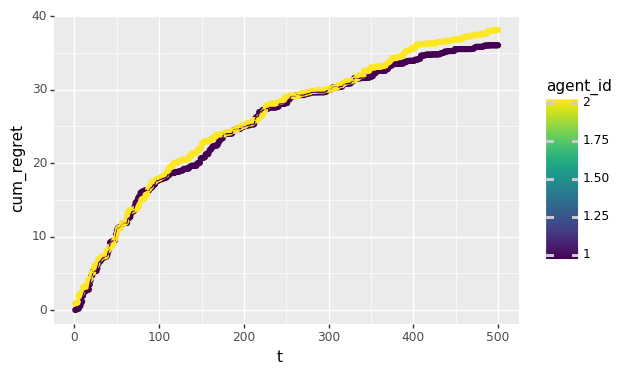

<ggplot: (8782262417249)>


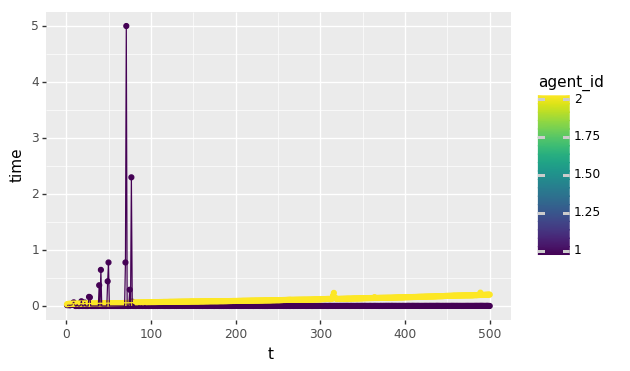

<ggplot: (8782262716849)>
theta [-0.31178367  0.72900392  0.21782079 -0.8990918  -2.48678065  0.91325152
  1.12706373 -1.51409323  1.63929108 -0.4298936   2.63128056  0.60182225
 -0.33588161  1.23773784  0.11112817  0.12915125  0.07612761 -0.15512816
  0.63422534  0.810655  ]


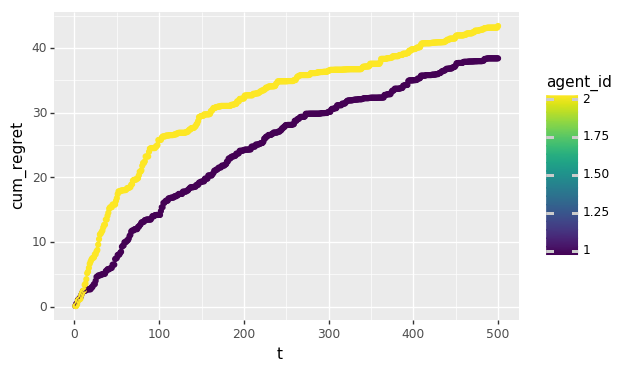

<ggplot: (8782262504769)>


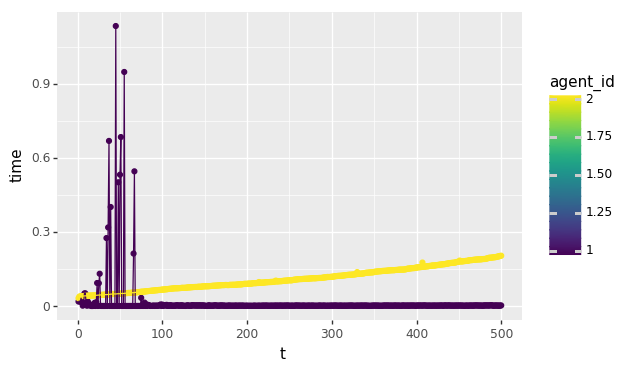

<ggplot: (8782306848669)>
theta [ 1.69052570e+00 -4.65937371e-01  3.28201637e-02  4.07516283e-01
 -7.88923029e-01  2.06557291e-03 -8.90385858e-04 -1.75472431e+00
  1.01765801e+00  6.00498516e-01 -6.25428974e-01 -1.71548261e-01
  5.05299374e-01 -2.61356415e-01 -2.42749079e-01 -1.45324141e+00
  5.54580312e-01  1.23880905e-01  2.74459924e-01 -1.52652453e+00]


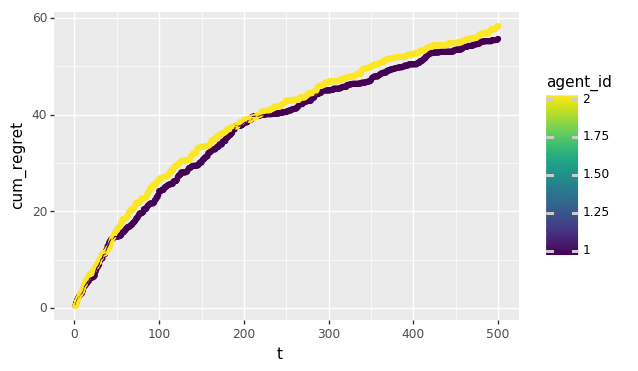

<ggplot: (8782306689425)>


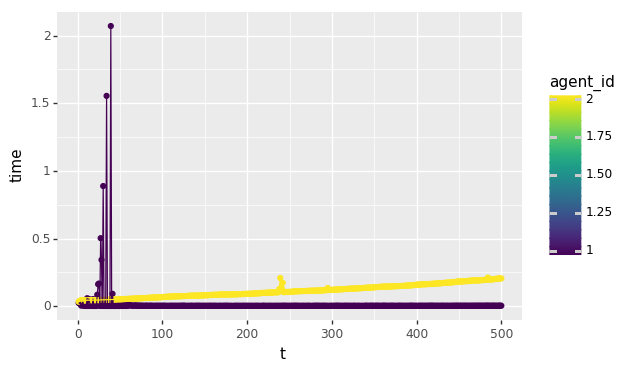

<ggplot: (8782306492233)>
theta [ 0.09120472  1.09128273 -1.94697031 -1.38634953 -2.29649157  2.4098343
  1.72783617  2.20455628  0.79482764  0.9764211  -1.18342715  1.91636361
 -1.1233268  -0.66403547 -0.37835857 -0.79161527  0.85954811 -0.230789
 -0.06566103 -0.20863623]


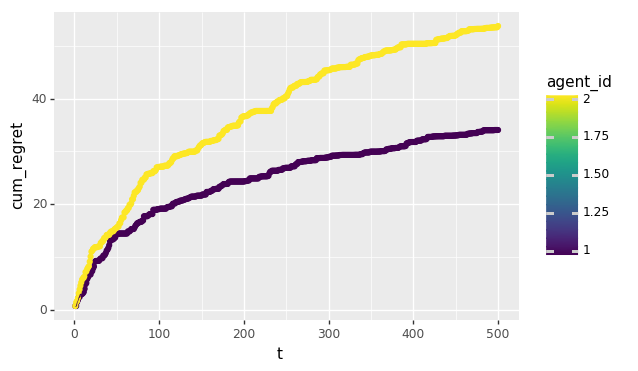

<ggplot: (8782306771765)>


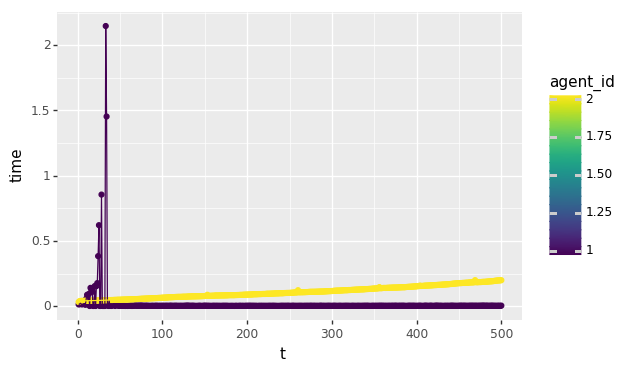

<ggplot: (8782306646641)>
theta [ 1.10855471e-03 -2.89544069e-01 -1.11606630e+00 -1.28827567e-02
 -3.78361464e-01 -4.81135363e-01 -1.51733118e+00 -4.90871981e-01
 -2.40680579e-01 -6.47947460e-01  6.35891080e-01  1.74011731e+00
  2.96682218e-01  7.07503662e-01  1.82281576e+00  4.30769029e-01
  1.54272963e+00 -9.00721171e-01 -1.37125010e-01  1.29757901e+00]


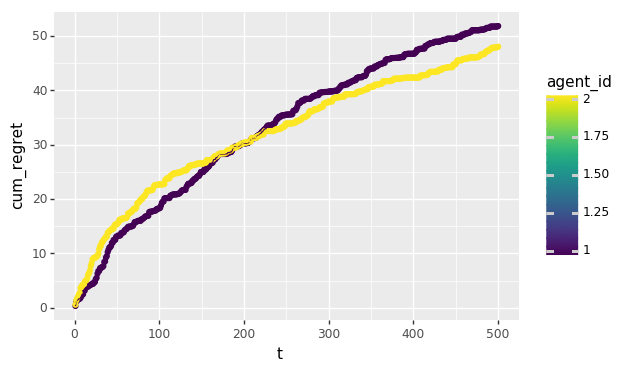

<ggplot: (8782306768765)>


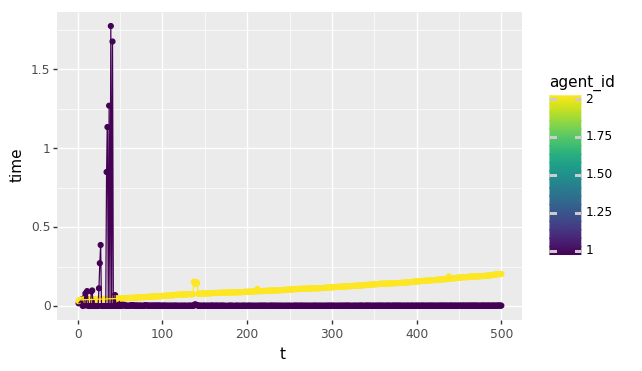

<ggplot: (8782306613037)>


In [21]:
name = 'logistic'
num_articles = 10
dim = 20
theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
#batch_size = 50
step_count=500 # number of langevin steps
step_size=0.01

alpha=0.2
beta=0.5
tol=0.0001

n_steps = 500 #number of experiment steps

verbosity=0

for seed in range(10):
    results, df = simple_compare_laplace_langevin_nobias(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
                                   alpha, beta, tol, n_steps, var=1.0/9, seed=seed, verbosity=verbosity)

#results, df = simple_compare_laplace_langevin(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
#                                   alpha, beta, tol, n_steps, seed=98, verbosity=1)



theta [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574]


logistic/agent_logistic.py:264: RuntimeWarning: overflow encountered in exp
  sampled_rewards.append(1/(1+np.exp(-theta.dot(x))))


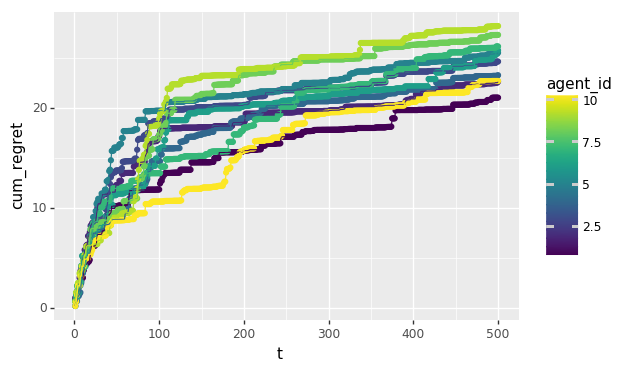

<ggplot: (8782263038185)>


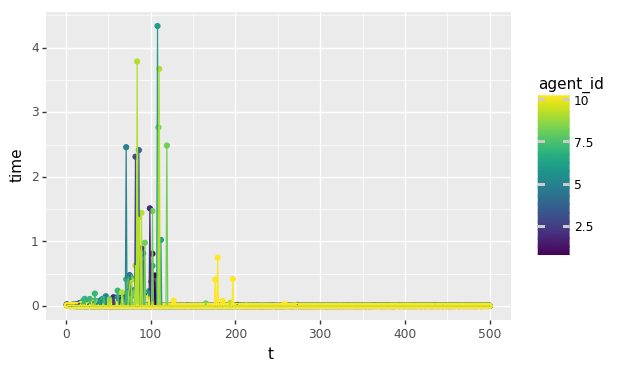

<ggplot: (8782306740577)>
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
  0.04221375  0.58281521]


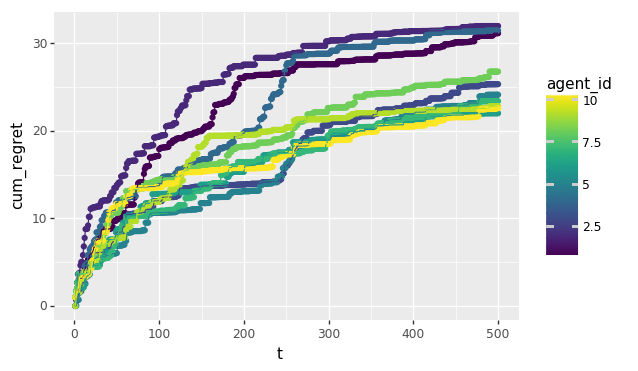

<ggplot: (8782306534473)>


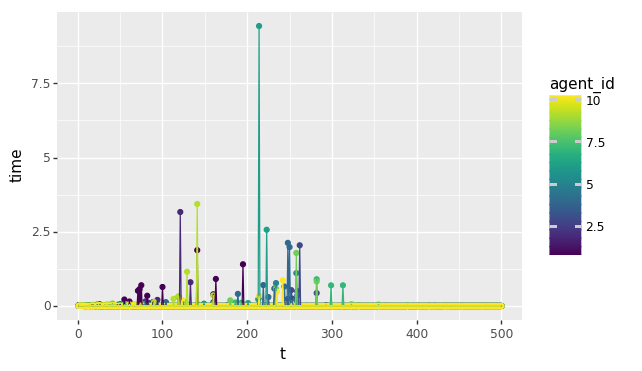

<ggplot: (8782306534533)>


In [24]:

for seed in range(2):
    results, df = simple_compare_laplace_laplace_nobias(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
                                   alpha, beta, tol, n_steps, seed=seed, verbosity=verbosity)

theta [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574]


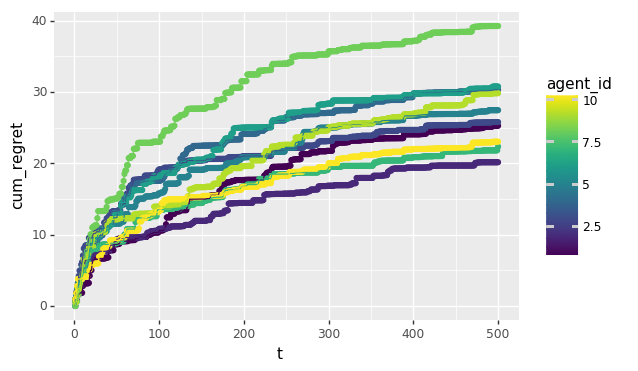

<ggplot: (8782263098349)>


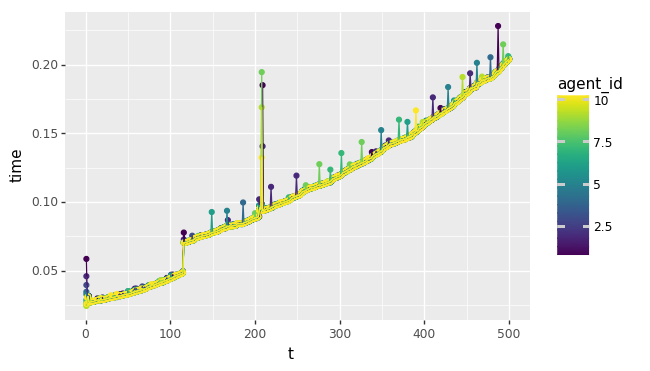

<ggplot: (8782263098133)>
theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
  0.04221375  0.58281521]


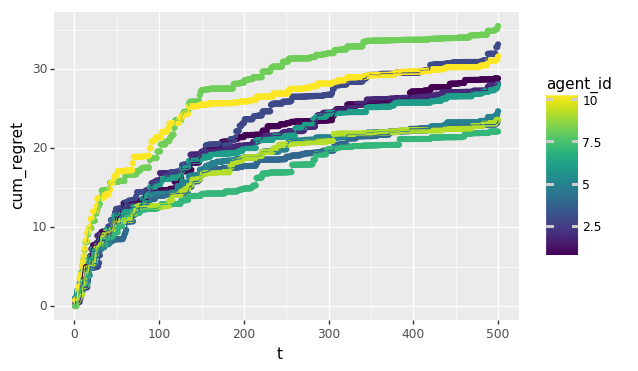

<ggplot: (8782306448497)>


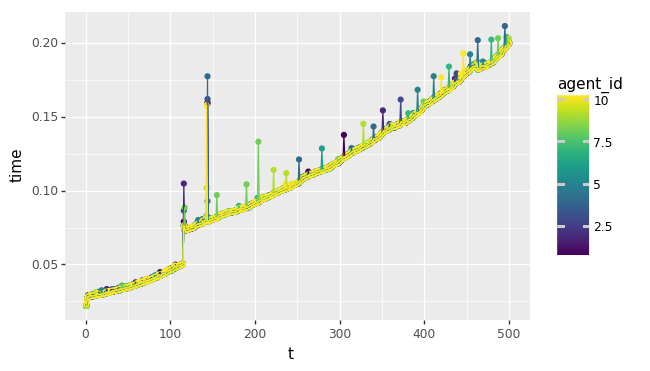

<ggplot: (8782262851085)>


In [27]:

for seed in range(2):
    results, df = simple_compare_langevin_nobias(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
                                   alpha, beta, tol, n_steps, seed=seed, verbosity=verbosity)

# Try with MALA

In [28]:
def simple_compare(agents, num_articles, dim, var, n_steps, seed=0, verbosity=0):
    env = LogisticBandit(num_articles, dim+1, NormalDist(0,1,dim=dim), DistributionWithConstant(NormalDist(0,var,dim=dim)), seed=seed)
    experiment = ExperimentCompare(agents, env, n_steps,
                   seed=seed, verbosity=verbosity) #, rec_freq=1, unique_id='NULL')
    experiment.run_experiment()
    results = []
    results.append(experiment.results)
    df = pd.DataFrame(results[0])
    print(gg.ggplot(df)
     + gg.aes('t', 'cum_regret', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    print(gg.ggplot(df)
     + gg.aes('t', 'time', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    return results, df

In [32]:
name = 'logistic'
num_articles = 10
dim = 20
var = 1.0/9
step_size=0.01
step_fn = lambda t: step_size/(1 + t * fnp.sqrt(dim*var)/dim)
theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
#batch_size = 50
step_count=500 # number of langevin steps
alpha=0.2
beta=0.5
tol=0.0001

n_steps = 500 #number of experiment steps

verbosity=0

make_laplace_agent = lambda: LaplaceTSLogisticBandit(num_articles, dim+1, theta_mean, theta_std, epsilon1,
                                                      alpha,beta,tol, verbosity=verbosity)
make_langevin_agent = lambda: BasicLangevinTS(num_articles, dim+1, [0]*(dim+1), cov=None, step_size=step_fn, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)
make_mala_agent = lambda: MalaTS(num_articles, dim+1, [0]*(dim+1), cov=None, step_size=step_fn, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)



In [33]:
for seed in range(1):
    agents = [make_laplace_agent()] +\
             [make_langevin_agent()] +\
             [make_mala_agent()]
    results, df = simple_compare(agents, num_articles, dim, var, n_steps, seed=0, verbosity=0)

#results, df = simple_compare_laplace_langevin(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
#                                   alpha, beta, tol, n_steps, seed=98, verbosity=1)



NameError: global name 'MalaTS' is not defined

# Other stuff

In [ ]:

laplace_agent = LaplaceTSLogisticBandit(num_articles, dim+1, theta_mean, theta_std, epsilon1,
                          alpha,beta,tol)
langevin_agent = BasicLangevinTS(num_articles, dim+1, [0,0,0], cov=None, step_size=step_size, n_steps=step_count, init_pt=None)
agents = [laplace_agent, langevin_agent]
env = LogisticBandit(num_articles, dim+1, None, None)
experiment = ExperimentCompare(agents, env, n_steps,
               seed=0) #, rec_freq=1, unique_id='NULL')

In [7]:
experiment.run_experiment()
results = []
results.append(experiment.results)

(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.001726
...........................................................................(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.041479
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000461
.....................................................................................................................................................................................................................................(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.114989
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000579
.............................................................................(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.032233
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000305
....................................................................................................................................................................

(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000209
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.000948
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000206
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001100
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000207
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001141
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000209
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.000812
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000208
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.000840
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000206
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.000966
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000208
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001123
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000208
..(u

In [10]:
df = pd.DataFrame(results[0])
print(df)


     action_id  agent_id  cum_optimal  cum_regret  instant_regret    t  \
0            1         1     0.983862    0.029972        0.029972    1   
1            2         2     0.983862    0.009794        0.009794    1   
2            3         1     1.937752    0.056612        0.026639    2   
3            4         2     1.937752    0.036433        0.026639    2   
4            5         1     2.921614    0.113224        0.056612    3   
5            6         2     2.921614    0.093045        0.056612    3   
6            7         1     3.905477    0.113224        0.000000    4   
7            8         2     3.905477    0.093045        0.000000    4   
8            9         1     4.889339    0.113224        0.000000    5   
9           10         2     4.889339    0.123018        0.029972    5   
10          11         1     5.843229    0.139863        0.026639    6   
11          12         2     5.843229    0.123018        0.000000    6   
12          13         1     6.827091 

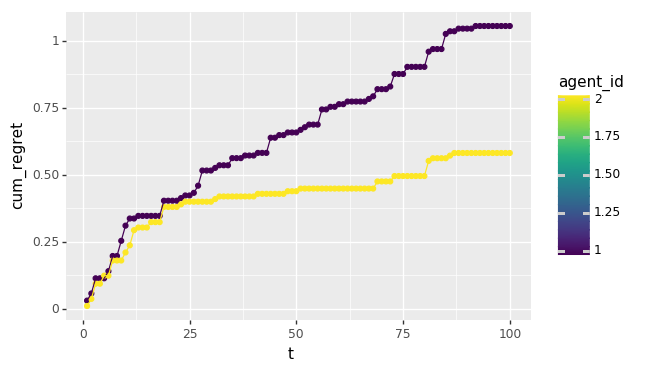

<ggplot: (8769594214729)>

In [11]:
(gg.ggplot(df)
 + gg.aes('t', 'cum_regret', color='agent_id', group='agent_id')
 + gg.geom_point()
 + gg.geom_line())

In [ ]:
(gg.ggplot(df)
 + gg.aes('t', 'time', color='agent_id', group='agent_id')
 + gg.geom_point()
 + gg.geom_line())

# Others

In [1]:


#from base import config_lib

#reload(config_lib)


name = 'logistic'
num_articles = 3
dim = 7
theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
batch_size = 50
step_count=200
step_size= 1/200

alpha=0.2
beta=0.5
tol=0.0001

n_steps = 1000

laplace_agent = LaplaceTSLogisticBandit(num_articles, dim, theta_mean, theta_std, epsilon1,
                          alpha,beta,tol)
langevin_agent = LangevinTSLogisticBandit(num_articles, dim, theta_mean, theta_std, epsilon1,
                          alpha,beta,tol,batch_size,step_count,step_size)
agents = [laplace_agent, langevin_agent]
env = LogisticBandit(num_articles, dim, None, None)
experiment = ExperimentCompare(agents, env, n_steps,
               seed=0) #, rec_freq=1, unique_id='NULL')

experiment.run_experiment()
results = []
results.append(experiment.results)



theta [-0.97769555  0.22777848  0.65704823 -0.89302459  0.05340289  0.69765882
 -1.4476157 ]
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.001566
..............................................................(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.018503
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.027187
...........................................................................(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.022236
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000233
..........................................................................................................................................................................................................................(update_observation, Lapla

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.024439
........................(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.007519
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000304
..........(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003258
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.024131
..............(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.004448
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
..........................................................................................(up

......(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003055
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.024603
.(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.000753
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000329
.......(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002566
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.024734
........(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002691
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000337
.......(update_observation, LaplaceTSLogisticBandi

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.034148
.......(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002452
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000299
....(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001493
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033015
.......(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002322
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000326
....(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001574
**************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033840
.....(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001797
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000303
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001224
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.032731
.....(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001878
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000338
.....(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002009
******************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033531
....(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001471
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000335
.....(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002003
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.031837
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001297
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000294
....(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001499
********************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033515
....(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001759
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000294
....(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001661
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.032291
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001338
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000328
....(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001706
*********************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033648
....(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001809
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000304
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001431
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.032549
.......(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003058
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000332
....(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001823
******************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033946
....(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001897
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000399
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001466
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.032441
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001522
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000333
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001096
************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033769
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001480
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000329
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001644
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033140
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001491
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000317
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001689
************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.034638
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001488
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000296
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001059
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033264
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001049
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000293
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001108
***************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.034688
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001092
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000301
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001692
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033248
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001091
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000333
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001557
**************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035267
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001602
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000296
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001683
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033327
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001640
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000294
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001606
************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035426
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001219
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000295
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001180
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033594
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001186
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000296
....(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002199
**************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037732
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001728
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001212
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.034557
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001698
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000295
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001710
*************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036462
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001784
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000295
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001257
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033526
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001162
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000222
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001200
***************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036689
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001287
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000299
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001292
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.034858
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001810
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001862
**************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.032637
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001323
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001462
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.034922
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001367
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000296
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001891
***************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038085
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001367
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000294
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001371
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035135
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001403
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000294
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001932
***************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038332
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002027
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001415
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035090
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001444
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001414
***************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037610
....(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.010613
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000276
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001486
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033116
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001886
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000296
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001729
*************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038506
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001499
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001905
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035175
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001500
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002250
***************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036977
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001550
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000297
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001587
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035121
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001575
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000297
...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002310
***************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037172
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001601
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001629
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035215
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001593
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000397
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001642
****************************************************************

..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.004106
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000294
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001687
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035425
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001646
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000294
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001681
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035354
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037088
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001759
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000296
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001724
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035302
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001743
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000294
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001723
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.034478
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001863
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000221
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001689
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033455
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001688
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000223
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001939
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.034480
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001888
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000275
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001931
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033758
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001862
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000277
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001886
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037416
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001913
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000295
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001915
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035567
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001906
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000296
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001926
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037550
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001989
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000395
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001978
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035683
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001936
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.001977
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037559
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.001997
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000295
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002027
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035898
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002006
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000295
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002041
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037616
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002082
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000297
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002058
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035673
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002185
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000296
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002096
****************************************************************

...(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.004436
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.033736
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002145
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000272
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002304
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.028577
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.004386
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000295
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037536
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002220
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000300
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002190
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036113
.................(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.015008
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000300
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002217
*************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037359
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003221
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000303
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002291
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036058
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002286
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000297
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002255
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.039211
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002346
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000301
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002360
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035932
.....(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.005106
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000298
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002364
*************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.039555
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002395
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000301
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002410
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036073
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002362
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000300
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002511
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037907
....(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.004336
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000303
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002588
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036188
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002483
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000300
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002498
**************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038061
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002519
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000304
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002554
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036258
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002559
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000303
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002554
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.035035
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002993
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000309
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002707
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036216
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002618
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000300
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002622
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038103
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002714
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000304
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002704
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036420
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002631
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000300
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002702
****************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038119
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002762
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000306
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002732
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036377
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002773
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000301
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002785
****************************************************************

..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.007782
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038363
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.002993
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000336
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002846
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036352
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003921
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000312
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0

..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.005395
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000313
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002912
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036551
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.004032
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000302
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.002922
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036624
...(update_observation, LangevinTSLogisticBandit) Time Elapsed:

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038500
...(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.004287
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000323
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003100
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036625
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003103
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000311
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003109
***************************************************************

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038484
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003200
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000322
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003179
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036469
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003192
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000318
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003195
****************************************************************

..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003278
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038532
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003377
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000327
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003279
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036582
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003396
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000316
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.

********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.038484
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003629
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000337
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003530
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036821
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003533
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000323
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003515
****************************************************************

..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.006520
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000362
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003632
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.036858
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0.003650
(pick_action, LaplaceTSLogisticBandit) Time Elapsed: 0.000322
..(update_observation, LaplaceTSLogisticBandit) Time Elapsed: 0.003635
********************************************************************************************************************************************************************************************************(pick_action, LangevinTSLogisticBandit) Time Elapsed: 0.037012
..(update_observation, LangevinTSLogisticBandit) Time Elapsed: 0

TypeError: 'DataFrame' object is not callable

In [5]:
results

[      action_id  agent_id  cum_optimal  cum_regret  instant_regret     t  \
 0             1         1     0.476799    0.000000        0.000000     1   
 1             2         2     0.476799    0.395537        0.395537     1   
 2             3         1     0.797639    0.000000        0.000000     2   
 3             4         2     0.797639    0.395537        0.000000     2   
 4             5         1     1.274438    0.000000        0.000000     3   
 5             6         2     1.274438    0.721448        0.325911     3   
 6             7         1     1.761377    0.166099        0.166099     4   
 7             8         2     1.761377    1.127124        0.405676     4   
 8             9         1     2.191821    0.312460        0.146361     5   
 9            10         2     2.191821    1.273484        0.146361     5   
 10           11         1     2.465171    0.312460        0.000000     6   
 11           12         2     2.465171    1.407077        0.133593     6   

      action_id  agent_id  cum_optimal  cum_regret  instant_regret     t  \
0             1         1     0.476799    0.000000        0.000000     1   
1             2         2     0.476799    0.395537        0.395537     1   
2             3         1     0.797639    0.000000        0.000000     2   
3             4         2     0.797639    0.395537        0.000000     2   
4             5         1     1.274438    0.000000        0.000000     3   
5             6         2     1.274438    0.721448        0.325911     3   
6             7         1     1.761377    0.166099        0.166099     4   
7             8         2     1.761377    1.127124        0.405676     4   
8             9         1     2.191821    0.312460        0.146361     5   
9            10         2     2.191821    1.273484        0.146361     5   
10           11         1     2.465171    0.312460        0.000000     6   
11           12         2     2.465171    1.407077        0.133593     6   
12          

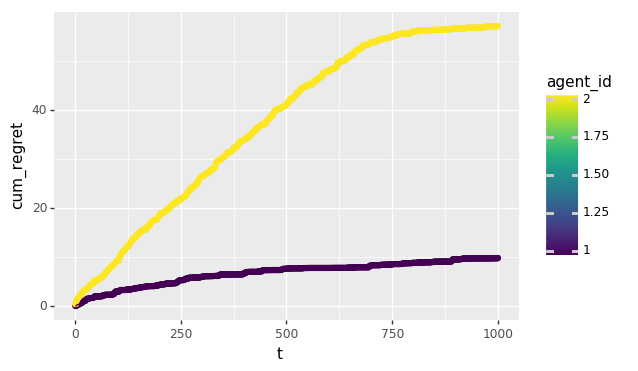

<ggplot: (8732685573365)>

In [13]:
import plotnine as gg

df = pd.DataFrame(results[0])
print(df)
(gg.ggplot(df)
 + gg.aes('t', 'cum_regret', color='agent_id', group='agent_id')
 + gg.geom_point()
 + gg.geom_line())

In [4]:

#############################################################################
# Collating data with Pandas
params_df = config_lib.get_params_df(config)
df = pd.merge(pd.concat(results), params_df, on='unique_id')
plt_df = (df.groupby(['agent', 't'])
          .agg({'instant_regret': np.mean})
          .reset_index())


#############################################################################
# Plotting and analysis (uses plotnine by default)
gg.theme_set(gg.theme_bw(base_size=16, base_family='serif'))
gg.theme_update(figure_size=(12, 8))

p = (gg.ggplot(plt_df)
     + gg.aes('t', 'instant_regret', colour='agent')
     + gg.geom_line())
print(p)

NameError: name 'config_lib' is not defined